# Weekly Task/Instructions

Start - 11/18

- Let's build a generic API call for 2019 and then copy it for each year (2005 - 2019)
- Save the API data called from Census website
- Separate dataframes for each year
- Filter ACS data based on above columns
- Filter ACS data based on census tracts
- Save New Data
- Create Diversity Index column
  - DI = 1 - (sum(8columns_percentages^2))

API: 7c0e4ed190ac93f0a67c85514e7e1b718dcc0215

Qualitative:
- Bibliography of sources of data/qualitative analysis
- Build Introduction and outline first half of Abstract

Map - 11/24

- Map Data onto New York
- Diversity Index Map
- Map the Diversity Index - Single Legend

Analysis

- Timelines for each of the neighborhoods (time series) based on race
- y-axis is years, x-axis is percentage of various races (8 series)
- line graph
- Build a predictive model
- average price per census tract
- Measure diversity Index over time

In [ ]:
#id	
#Geographic Area Name
#Estimate!!RACE!!Total population: DP05_0028E
#Estimate!!Total housing units: DP05_0081E
#Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race): DP05_0066PE
#Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone: DP05_0072PE
#Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone: DP05_0073PE
#Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone: DP05_0074PE
#Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone: DP05_0075PE
#Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone: DP05_0076PE
#Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone: DP05_0077PE
#Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races: DP05_0078PE

2035

In [ ]:
#!rm -rf /content/Urban_Rezoning_Displacement # DO NOT RUN THIS - Unless you know what you are doing!

In [ ]:
# Rerun this line if there are new data that is uploaded to Github
# This will "pull" the new data files from github to content folder
!git pull

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Run this Section

In [ ]:
 # Run This
 !pip install geopandas # Installed | If not uncomment and rerun this line!

     |████████████████████████████████| 1.0 MB 2.6 MB/s 
     |████████████████████████████████| 6.3 MB 24.6 MB/s 
     |████████████████████████████████| 15.4 MB 27.5 MB/s 


In [ ]:
# Run This
# Import useful libraries for later data manipulation
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import math
import os 
import seaborn as sns
from shapely.geometry import Point
# For API
import time, json
import requests
try: #spelling depends on enviroment version 
    import urllib2 as urllib #URL handling module
except ImportError:
    import urllib.request as urllib
# For ML
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
import sklearn
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
# Helpful to determine correct kernel size
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans

In [ ]:
# Run This
# Already been cloned | Rerun this if needed!
!git clone https://github.com/JGuo99/Urban_Rezoning_Displacement.git

Cloning into 'Urban_Rezoning_Displacement'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 154 (delta 14), reused 132 (delta 8), pack-reused 0
Receiving objects: 100% (154/154), 93.98 MiB | 13.67 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Checking out files: 100% (104/104), done.


In [ ]:
# Run This for DP05 data
years = ['2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016',
         '2017', '2018', '2019'] # 5yr data | Example: 2009 = 2005 to 2009 and 2010 = 2006 to 2010 and so on...
api_key = "7c0e4ed190ac93f0a67c85514e7e1b718dcc0215"

# This function will get all DP05 (Demographic) Data.
# It is possible to filter the data during fetching, but to play it safe, getting
# all the data and filter it after might be better. This way we can control what we want.
for x in years:
  url = str("https://api.census.gov/data/{}/acs/acs5/profile?get=group(DP05)&for=tract:*&in=state:36&key={}").format(x, api_key)
  # print(url) # To Test If URL is properly working
  apiData = urllib.urlopen(url).read().decode('utf-8')  # Fetching api data from url
  apiData_JSON = json.loads(apiData) # "Converts" into JSON
  apiData_df = pd.DataFrame(apiData_JSON) # Creates dataframe from JSON
  apiData_df.to_csv("/content/" + x + "_acs_data.csv", index=False, header=False) # Save as CSV under content folder

In [ ]:
# Run This
inwood_array = ['Census Tract 291, New York County, New York', 'Census Tract 293, New York County, New York',
                'Census Tract 295, New York County, New York', 'Census Tract 299, New York County, New York',
                'Census Tract 303, New York County, New York', 'Census Tract 307, New York County, New York']
rockaway_array = ['Census Tract 998.01, Queens County, New York', 'Census Tract 998.02, Queens County, New York',
                'Census Tract 1008.01, Queens County, New York', 'Census Tract 1008.02, Queens County, New York',
                'Census Tract 1010.01, Queens County, New York', 'Census Tract 1010.01, Queens County, New York',
                'Census Tract 1032.01, Queens County, New York','Census Tract 1032.02, Queens County, New York']
jerome_array = ['Census Tract 179.01, Bronx County, New York', 'Census Tract 179.02, Bronx County, New York',
                'Census Tract 181.02, Bronx County, New York', 'Census Tract 183.01, Bronx County, New York',
                'Census Tract 195, Bronx County, New York', 'Census Tract 225, Bronx County, New York',
                'Census Tract 227.03, Bronx County, New York', 'Census Tract 229.01, Bronx County, New York',
                'Census Tract 233.02, Bronx County, New York', 'Census Tract 235.02, Bronx County, New York',
                'Census Tract 237.02, Bronx County, New York', 'Census Tract 237.03, Bronx County, New York',
                'Census Tract 237.04, Bronx County, New York', 'Census Tract 235.01, Bronx County, New York',
                'Census Tract 233.01, Bronx County, New York', 'Census Tract 227.01, Bronx County, New York',
                'Census Tract 227.02, Bronx County, New York', 'Census Tract 209, Bronx County, New York',
                'Census Tract 223, Bronx County, New York', 'Census Tract 221.02, Bronx County, New York',
                'Census Tract 383.01, Bronx County, New York']
east_ny_array = ['Census Tract 1156, Kings County, New York','Census Tract 1134, Kings County, New York',
               'Census Tract 1144, Kings County, New York','Census Tract 1158, Kings County, New York',
               'Census Tract 1150, Kings County, New York','Census Tract 1124, Kings County, New York',
               'Census Tract 1162, Kings County, New York','Census Tract 1118, Kings County, New York',
               'Census Tract 1192, Kings County, New York','Census Tract 1174, Kings County, New York',
               'Census Tract 1168, Kings County, New York','Census Tract 1178, Kings County, New York'
               'Census Tract 1208, Kings County, New York','Census Tract 1142.01, Kings County, New York',
               'Census Tract 908, Kings County, New York','Census Tract 1132, Kings County, New York']
east_harlem_array = ['Census Tract 172, New York County, New York', 'Census Tract 166, New York County, New York',
                'Census Tract 170, New York County, New York', 'Census Tract 180, New York County, New York',
                'Census Tract 182, New York County, New York', 'Census Tract 188, New York County, New York',
                'Census Tract 194, New York County, New York', 'Census Tract 196, New York County, New York',
                'Census Tract 242, New York County, New York', 'Census Tract 192, New York County, New York',
                'Census Tract 174.02, New York County, New York', 'Census Tract 184, New York County, New York',
                'Census Tract 198, New York County, New York', 'Census Tract 206, New York County, New York']
bay_array = ['Census Tract 21, Richmond County, New York', 'Census Tract 40.01, Richmond County, New York', 'Census Tract 27, Richmond County, New York']
gowanus_array = ['Census Tract 141, Kings County, New York', 'Census Tract 139, Kings County, New York',
                'Census Tract 137, Kings County, New York', 'Census Tract 135, Kings County, New York',
                'Census Tract 133, Kings County, New York', 'Census Tract 131, Kings County, New York',
                'Census Tract 129.01, Kings County, New York', 'Census Tract 39, Kings County, New York',
                'Census Tract 41, Kings County, New York', 'Census Tract 71, Kings County, New York',
                'Census Tract 127, Kings County, New York', 'Census Tract 75, Kings County, New York',
                'Census Tract 77, Kings County, New York', 'Census Tract 119, Kings County, New York',
                'Census Tract 121, Kings County, New York', 'Census Tract 117, Kings County, New York',]
              

In [ ]:
#Run This
# You can move the GEO_ID, NAME, state, county, and Tract from the end to the front 
# of the dataframe. It is not necessary, since it's still in the dataframe.
def beautifyCol(your_df):
  move_column = ['tract', 'county', 'state', 'NAME', 'GEO_ID']
  for i in move_column:
    pre = your_df.pop(i)
    your_df.insert(0, i, pre)
  return your_df

In [ ]:
# Run This
neigh_name = ['inwood', 'rockaway', 'jerome', 'east_harlem', 'bay', 'east_ny', 'gowanus']
# neigh_name = ['east_ny'] # to Test

# After you run this all the dataframe will be created for each year with each neighborhood!
for i in years:
  fetch_csv = pd.read_csv(i + '_acs_data.csv') # Get the saved csv file from api call
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_df_' + i # Dynamically create names for each data frame and neighborhood
    array_name = neigh_name[j] + '_array'  # Pull in the corresponding array of census tract
    vars()[df_name] = beautifyCol(fetch_csv.loc[fetch_csv['NAME'].isin(vars()[array_name])])


# Education Index

In [ ]:
years = ['2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016',
         '2017', '2018', '2019'] # 5yr data | Example: 2009 = 2005 to 2009 and 2010 = 2006 to 2010 and so on...
api_key = "7c0e4ed190ac93f0a67c85514e7e1b718dcc0215"

# This function will get all DP05 (Demographic) Data.
# It is possible to filter the data during fetching, but to play it safe, getting
# all the data and filter it after might be better. This way we can control what we want.
for x in years:
  url = str("https://api.census.gov/data/{}/acs/acs5/profile?get=group(DP02)&for=tract:*&in=state:36&key={}").format(x, api_key)
  # print(url) # To Test If URL is properly working
  apiData = urllib.urlopen(url).read().decode('utf-8')  # Fetching api data from url
  apiData_JSON = json.loads(apiData) # "Converts" into JSON
  apiData_df = pd.DataFrame(apiData_JSON) # Creates dataframe from JSON
  apiData_df.to_csv("/content/" + x + "_acs_data_02.csv", index=False, header=False) # Save as CSV under content folder

In [ ]:
# Run This
neigh_name = ['inwood', 'rockaway', 'jerome', 'east_harlem', 'bay', 'east_ny', 'gowanus']
# neigh_name = ['east_ny'] # to Test

# After you run this all the dataframe will be created for each year with each neighborhood!
for i in years:
  fetch_csv = pd.read_csv(i + '_acs_data_02.csv') # Get the saved csv file from api call
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_edf_' + i # Dynamically create names for each data frame and neighborhood
    array_name = neigh_name[j] + '_array'  # Pull in the corresponding array of census tract
    vars()[df_name] = beautifyCol(fetch_csv.loc[fetch_csv['NAME'].isin(vars()[array_name])])

In [ ]:
#filter columns for DP02 data (2019 onwards)
#HOWARD USE THIS

# 59E(less than high school), 60E(some high school), 61E(High school graduate), 62E(Some college), 
# 63E(Associate's degree), 64E(Bachelor's degree), 65E(Graduate / professional degree), 66E(hi)

def filtercolumns_education_post2018(df):
  
  # keep = ['GEO_ID' ,	'NAME' ,	'state', 	'county' ,	'tract' ,
  #         'DP02_0060E','DP02_0061E','DP02_0062E','DP02_0063E',
  #         'DP02_0064E','DP02_0065E','DP02_0066E',,'DP03_0062E']

  keep = ['NAME','DP02_0060PE','DP02_0061PE','DP02_0062PE','DP02_0063PE',
      'DP02_0064PE','DP02_0065PE','DP02_0066PE']
  df = df[keep]
  return df

In [ ]:
#filter columns for DP02 data (2019 onwards)
#HOWARD USE THIS
def filtercolumns_education_till2018(df):
  # keep = ['GEO_ID' ,	'NAME' ,	'state', 	'county' ,	'tract' ,
  #         'DP02_0059E','DP02_0060E','DP02_0061E','DP02_0062E','DP02_0063E',
  #         'DP02_0064E','DP02_0065E','DP03_0062E']

  keep = ['NAME','DP02_0059PE','DP02_0060PE','DP02_0061PE','DP02_0062PE','DP02_0063PE',
        'DP02_0064PE','DP02_0065PE']
      
  df = df[keep]
  return df

In [ ]:
def educationindex_till18(df):
  df['EI'] = [1]*df.shape[0]
  sum = [0]*df.shape[0]
  div_cols  = [ 'DP02_0060PE','DP02_0061PE','DP02_0062PE','DP02_0063PE',
          'DP02_0064PE','DP02_0065PE','DP02_0059PE']
  for i in div_cols:
    sum = sum + ((df[i].astype(float)**2)/10000)
  df['EI'] = df['EI'] - sum
  return df

def educationindex_post18(df):
  df['EI'] = [1]*df.shape[0]
  sum = [0]*df.shape[0]
  div_cols  = ['DP02_0060PE','DP02_0061PE','DP02_0062PE','DP02_0063PE',
          'DP02_0064PE','DP02_0065PE','DP02_0066PE']
  for i in div_cols:
    sum = sum + ((df[i].astype(float)**2)/10000)
  df['EI'] = df['EI'] - sum
  return df

In [ ]:
# # Filter and Calculate Education Index for each neighborhood per cenesus tract for each year (2009 - 2019)
# # After you run this all the dataframe will be created for each year with each neighborhood!
# for i in ['2009', '2010', '2011', '2012','2013', '2014', '2015', '2016','2017', '2018']:
#   for j in range(len(neigh_name)):
#     df_name = neigh_name[j] + '_ei_' + i # FORMAT: neighborhood_ei_year
#     # vars()[df_name] = filtercolumns_education_till2018(vars()[neigh_name[j] + '_edf_' + i]) #filter columns DP03 and DP02
#     #should calculate EI without disrupting DP02 - median income column
#     vars()[df_name] = educationindex_till18(filtercolumns_education_till2018(vars()[neigh_name[j] + '_edf_' + i])) 

# for i in ['2019']:
#   for j in range(len(neigh_name)):
#     df_name = neigh_name[j] + '_ei_' + i # FORMAT: neighborhood_ei_year
#     # vars()[df_name] = filtercolumns_education_post2018(vars()[neigh_name[j] + '_edf_' + i])
#     vars()[df_name] = educationindex_post18(filtercolumns_education_post2018(vars()[neigh_name[j] + '_edf_' + i]))
# # Call the calculated dataframe by: neighborhood_ei_year

In [ ]:
# Filter and Calculate Education Index for each neighborhood per cenesus tract for each year (2009 - 2019)
# After you run this all the dataframe will be created for each year with each neighborhood!
for i in ['2009', '2010', '2011', '2012','2013', '2014', '2015', '2016','2017', '2018']:
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_ei_' + i # FORMAT: neighborhood_ei_year
    # vars()[df_name] = filtercolumns_education_till2018(vars()[neigh_name[j] + '_edf_' + i]) #filter columns DP03 and DP02
    #should calculate EI without disrupting DP02 - median income column
    globals()[df_name] = filtercolumns_education_till2018(globals()[neigh_name[j] + '_edf_' + i])

for i in ['2019']:
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_ei_' + i # FORMAT: neighborhood_ei_year
    # vars()[df_name] = filtercolumns_education_post2018(vars()[neigh_name[j] + '_edf_' + i])
    globals()[df_name] = filtercolumns_education_post2018(globals()[neigh_name[j] + '_edf_' + i])
# Call the calculated dataframe by: neighborhood_ei_year

In [ ]:
for i in ['2009', '2010', '2011', '2012','2013', '2014', '2015', '2016']:
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_ei_' + i # FORMAT: neighborhood_di_year
    vars()[df_name] = educationindex_till18(filtercolumns_education_till2018(vars()[neigh_name[j] + '_edf_' + i]))

for i in [ '2019']:
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_ei_' + i # FORMAT: neighborhood_di_year
    vars()[df_name] = educationindex_post18(filtercolumns_education_post2018(vars()[neigh_name[j] + '_edf_' + i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
inwood_ei_2009

,NAME,DP02_0059PE,DP02_0060PE,DP02_0061PE,DP02_0062PE,DP02_0063PE,DP02_0064PE,DP02_0065PE,EI
3104,"Census Tract 291, New York County, New York",33.1,17.4,21.3,13.7,5.7,6.5,2.3,0.788022
3105,"Census Tract 293, New York County, New York",31.6,12.8,19.3,9.7,4.1,17.0,5.3,0.803712
3106,"Census Tract 295, New York County, New York",7.3,6.1,16.6,16.3,4.9,26.0,22.8,0.814840
3109,"Census Tract 303, New York County, New York",8.0,9.0,14.8,12.8,4.9,25.6,24.9,0.817274
3110,"Census Tract 307, New York County, New York",2.4,3.9,13.8,14.5,4.1,24.1,37.1,0.760431


# Education Index Hypothesis Testing


In [ ]:
stats.ks_2samp(inwood_ei_2009['EI'], inwood_ei_2019['EI'])

Ks_2sampResult(statistic=0.5, pvalue=0.3571428571428573)

In [ ]:
stats.ks_2samp(jerome_ei_2009['EI'], jerome_ei_2019['EI'])

Ks_2sampResult(statistic=0.47619047619047616, pvalue=0.044581735750667484)

In [ ]:
stats.ks_2samp(rockaway_ei_2009['EI'], rockaway_ei_2019['EI'])

Ks_2sampResult(statistic=0.6666666666666666, pvalue=0.2500000000000002)

In [ ]:
stats.ks_2samp(east_harlem_ei_2009['EI'], east_harlem_ei_2019['EI'])

Ks_2sampResult(statistic=0.2619047619047619, pvalue=0.6843530033030638)

In [ ]:
stats.ks_2samp(east_ny_ei_2009['EI'], east_ny_ei_2019['EI'])

Ks_2sampResult(statistic=0.17032967032967034, pvalue=0.9641284156683269)

In [ ]:
stats.ks_2samp(gowanus_ei_2009['EI'], gowanus_ei_2019['EI'])

Ks_2sampResult(statistic=0.5625, pvalue=0.005538107806179027)

In [ ]:
stats.ks_2samp(bay_ei_2009['EI'], bay_ei_2019['EI'])

Ks_2sampResult(statistic=0.5, pvalue=1.0)

In [ ]:
bay_ei_2009

,NAME,Less than High School,some high school,High school graduate,Some college,Associate's degree,Bachelor's degree,Graduate or professional degree,EI
4013,"Census Tract 21, Richmond County, New York",9.9,12.7,32.4,14.5,4.9,11.3,14.3,0.812450
4014,"Census Tract 27, Richmond County, New York",13.8,10.3,39.2,15.0,4.4,11.8,5.5,0.775298


In [ ]:
education_lvl = ['Less than High School', 	'some high school', 	'High school graduate' , 	'Some college', 	'Associate\'s degree', 	'Bachelor\'s degree' ,	'Graduate or professional degree' 	]

In [ ]:
index = neigh_name
columns = education_lvl

ks_comparison_matrix = pd.DataFrame(index=index, columns=columns)
ks_comparison_matrix = ks_comparison_matrix.fillna('-')
for i in neigh_name: 
    for j in education_lvl:
        df_name_09 = i + '_ei_2009'
        df_name_19 = i + '_ei_2019'
        ks_test = stats.ks_2samp(vars()[df_name_09][j], vars()[df_name_19][j])
        ks_comparison_matrix.loc[i][j] = ks_test[1]

In [ ]:
ks_comparison_matrix

,Less than High School,some high school,High school graduate,Some college,Associate's degree,Bachelor's degree,Graduate or professional degree
inwood,0.688312,0.965368,0.818182,0.818182,0.108225,0.818182,0.965368
rockaway,0.4,0.4,0.166667,0.7,0.0666667,0.533333,0.533333
jerome,0.124683,0.707931,0.752381,0.795562,0.424288,0.0625978,0.14787
east_harlem,0.0124816,0.0733365,0.425691,0.20582,0.00790664,0.230252,0.00388457
bay,1,1,1,0.333333,1,0.333333,1
east_ny,0.952898,0.012633,0.938179,0.34332,0.397849,0.221199,0.557227
gowanus,0.0933263,0.0111994,0.142279,0.0322426,0.223462,0.00891028,0.022432


In [ ]:
stats.ks_2samp(jerome_ei_2009['Graduate or professional degree'],jerome_ei_2019['Graduate or professional degree'] )

Ks_2sampResult(statistic=0.39285714285714285, pvalue=0.14786998560273212)

# Diversity Index

In [ ]:
def filtercolumns_till16(df):
  keep = ['GEO_ID' ,	'NAME' ,	'state', 	'county' ,	'tract' ,'DP05_0028E','DP05_0081E','DP05_0066PE','DP05_0072PE','DP05_0073PE','DP05_0074PE','DP05_0075PE','DP05_0076PE','DP05_0077PE','DP05_0078PE'	]
  df = df[keep]
  return df

In [ ]:

def filtercolumns_post16(df):
  keep = ['GEO_ID' ,	'NAME' ,	'state', 	'county' ,	'tract' ,'DP05_0033E','DP05_0086E', 'DP05_0071PE','DP05_0077PE','DP05_0078PE','DP05_0079PE','DP05_0080PE','DP05_0081PE','DP05_0082PE','DP05_0083PE']
  df = df[keep]
  return df

In [ ]:
def diversityindex_till16(df):
  df['DI'] = [1]*df.shape[0]
  sum = [0]*df.shape[0]
  div_cols  = ['DP05_0066PE','DP05_0072PE','DP05_0073PE','DP05_0074PE','DP05_0075PE','DP05_0076PE','DP05_0077PE','DP05_0078PE']
  for i in div_cols:
    sum = sum + ((df[i]**2)/10000)
  df['DI'] = df['DI'] - sum
  return df

def diversityindex_post16(df):
  df['DI'] = [1]*df.shape[0]
  sum = [0]*df.shape[0]
  div_cols  = ['DP05_0071PE','DP05_0077PE','DP05_0078PE','DP05_0079PE','DP05_0080PE','DP05_0081PE','DP05_0082PE','DP05_0083PE']
  for i in div_cols:
    sum = sum + ((df[i]**2)/10000)
  df['DI'] = df['DI'] - sum
  return df

In [ ]:
# Filter and Calculate Diversity Index for each neighborhood per cenesus tract for each year (2009 - 2019)
# After you run this all the dataframe will be created for each year with each neighborhood!
for i in ['2009', '2010', '2011', '2012','2013', '2014', '2015', '2016']:
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_di_' + i # FORMAT: neighborhood_di_year
    vars()[df_name] = diversityindex_till16(filtercolumns_till16(vars()[neigh_name[j] + '_df_' + i]))

for i in ['2017', '2018', '2019']:
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_di_' + i # FORMAT: neighborhood_di_year
    vars()[df_name] = diversityindex_post16(filtercolumns_post16(vars()[neigh_name[j] + '_df_' + i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
for i in neigh_name:
  for j in ['2009', '2010', '2011', '2012','2013', '2014', '2015', '2016']:
    vars()[i + '_di_' + j].rename(columns={'DP05_0028E':'Estimate!!RACE!!Total population', 'DP05_0081E':'Estimate!!Total housing units', 'DP05_0066PE':'Hispanic or Latino', 'DP05_0072PE':'White alone',\
'DP05_0073PE':'Black or African American alone', 'DP05_0074PE':'American Indian and Alaska Native alone', 'DP05_0075PE':'Asian alone',\
'DP05_0076PE':'Native Hawaiian and Other Pacific Islander alone', 'DP05_0077PE':'Some other race alone', 'DP05_0078PE':'Two or more races'}, inplace=True)
  for j in ['2017', '2018', '2019']:
    vars()[i + '_di_' + j].rename(columns={'DP05_0033E':'Estimate!!RACE!!Total population', 'DP05_0086E':'Estimate!!Total housing units', 'DP05_0071PE':'Hispanic or Latino', 'DP05_0077PE':'White alone',\
'DP05_0078PE':'Black or African American alone', 'DP05_0079PE':'American Indian and Alaska Native alone', 'DP05_0080PE':'Asian alone',\
'DP05_0081PE':'Native Hawaiian and Other Pacific Islander alone', 'DP05_0082PE':'Some other race alone', 'DP05_0083PE':'Two or more races'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Diversity Hypothesis Testing


In [ ]:
bay_di_2009

,GEO_ID,NAME,state,county,tract,Estimate!!RACE!!Total population,Estimate!!Total housing units,Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,DI
4013,1400000US36085002100,"Census Tract 21, Richmond County, New York",36,85,2100,3415,1367,27.2,29.9,33.5,0.0,7.6,0.0,0.0,1.8,0.71829
4014,1400000US36085002700,"Census Tract 27, Richmond County, New York",36,85,2700,1694,407,9.4,39.3,38.6,0.0,12.7,0.0,0.0,0.0,0.67159


In [ ]:
race = ['Hispanic or Latino', 	'White alone', 	'Black or African American alone', 	'American Indian and Alaska Native alone', 	'Asian alone', 	'Native Hawaiian and Other Pacific Islander alone', 	'Some other race alone', 	'Two or more races'	]

In [ ]:
index = neigh_name
columns = race

ks_comparison_matrix = pd.DataFrame(index=index, columns=columns)
ks_comparison_matrix = ks_comparison_matrix.fillna('-')
for i in neigh_name: 
    for j in race:
        df_name_09 = i + '_di_2009'
        df_name_19 = i + '_di_2019'
        ks_test = stats.ks_2samp(vars()[df_name_09][j], vars()[df_name_19][j])
        ks_comparison_matrix.loc[i][j] = ks_test[1]

In [ ]:
ks_comparison_matrix

,Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races
inwood,0.965368,0.991342,0.818182,0.818182,0.108225,1,0.025974,0.238095
rockaway,0.7,0.85,0.533333,0.25,0.0666667,1,0.533333,0.4
jerome,0.104608,0.1703,0.226753,0.991512,0.226753,1,0.707931,0.752381
east_harlem,0.684353,0.20582,0.978335,0.934799,0.300351,1,0.797265,0.853351
bay,0.333333,1,0.333333,1,0.333333,1,0.333333,0.333333
east_ny,0.492157,0.0249315,0.972681,1,0.182076,1,0.651119,0.288792
gowanus,0.123399,0.497875,0.27373,0.987503,0.022432,1,0.0377533,0.00693096


In [ ]:
stats.ks_2samp(gowanus_di_2009['White alone'],gowanus_di_2019['White alone'] )

Ks_2sampResult(statistic=0.2791666666666667, pvalue=0.4978749847420578)

# Merging DP02, DP03, and DP05

In [ ]:
#Do Not Run Unless Needed
# Merging DP02 + DP03 + DP05 and Saving it to csv file!
years = ['2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016',
         '2017', '2018', '2019']
dp_data = ['DP02', 'DP03']
api_key = "7c0e4ed190ac93f0a67c85514e7e1b718dcc0215"

for i in years:
  merged_df = pd.read_csv("/content/"+ i +"_acs_data.csv")
  for j in dp_data:
    url = str("https://api.census.gov/data/{}/acs/acs5/profile?get=group({})&for=tract:*&in=state:36&key={}").format(i, j, api_key)
    apiData = urllib.urlopen(url).read().decode('utf-8')
    apiData_JSON = json.loads(apiData) 
    apiData_df = pd.DataFrame(apiData_JSON)
    apiData_df.columns = apiData_df.iloc[0]
    apiData_df = apiData_df.drop(apiData_df.index[0])
    merged_df = pd.concat([merged_df, apiData_df], axis=1).drop_duplicates().reset_index(drop=True)
  if (os.path.exists('/content/merges') == False):  # Create folder if merge folder does not exist
    os.mkdir('merges')  
  merged_df.to_csv("/content/merges/" + i + "_merged_data.csv") # (index=False, header=False) does not work properly | Save as CSV under merges folder

KeyboardInterrupt: ignored

In [ ]:
#Do Not Run Unless Needed
# Merging DP02 + DP03 + DP05 and Saving it to csv file!
years = ['2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016',
         '2017', '2018', '2019']
dp_data = ['DP02', 'DP03']
api_key = "7c0e4ed190ac93f0a67c85514e7e1b718dcc0215"

for i in years:
  merged_df = []
  for j in dp_data:
    url = str("https://api.census.gov/data/{}/acs/acs5/profile?get=group({})&for=tract:*&in=state:36&key={}").format(i, j, api_key)
    apiData = urllib.urlopen(url).read().decode('utf-8')
    apiData_JSON = json.loads(apiData) 
    apiData_df = pd.DataFrame(apiData_JSON)
    apiData_df.columns = apiData_df.iloc[0]
    apiData_df = apiData_df.drop(apiData_df.index[0])
    merged_df = pd.concat([merged_df, apiData_df], axis=1).drop_duplicates().reset_index(drop=True)
  if (os.path.exists('/content/merges') == False):  # Create folder if merge folder does not exist
    os.mkdir('merges')  
  merged_df.to_csv("/content/merges/" + i + "_merged_DP02_DP03.csv") # (index=False, header=False) does not work properly | Save as CSV under merges folder

#Diversity Index Testing


In [ ]:
stats.ks_2samp(inwood_di_2009['DI'], inwood_di_2019['DI'])

Ks_2sampResult(statistic=0.23333333333333334, pvalue=0.9913419913419913)

In [ ]:
stats.ks_2samp(jerome_di_2009['DI'], jerome_di_2019['DI'])

Ks_2sampResult(statistic=0.32142857142857145, pvalue=0.33765594644590624)

In [ ]:
stats.ks_2samp(rockaway_di_2009['DI'], rockaway_di_2019['DI'])

Ks_2sampResult(statistic=0.3333333333333333, pvalue=0.9333333333333333)

In [ ]:
stats.ks_2samp(east_harlem_di_2009['DI'], east_harlem_di_2019['DI'])

Ks_2sampResult(statistic=0.5357142857142857, pvalue=0.03235138801163839)

In [ ]:
stats.ks_2samp(east_ny_di_2009['DI'], east_ny_di_2019['DI'])

Ks_2sampResult(statistic=0.4010989010989011, pvalue=0.18207564948176103)

In [ ]:
stats.ks_2samp(gowanus_di_2009['DI'], gowanus_di_2019['DI'])

Ks_2sampResult(statistic=0.15, pvalue=0.9784531084103409)

In [ ]:
stats.ks_2samp(bay_di_2009['DI'], bay_di_2019['DI'])

Ks_2sampResult(statistic=1.0, pvalue=0.3333333333333333)

# Diversity Index Plot

Inwood:

Text(0.5, 1.0, 'Inwood')

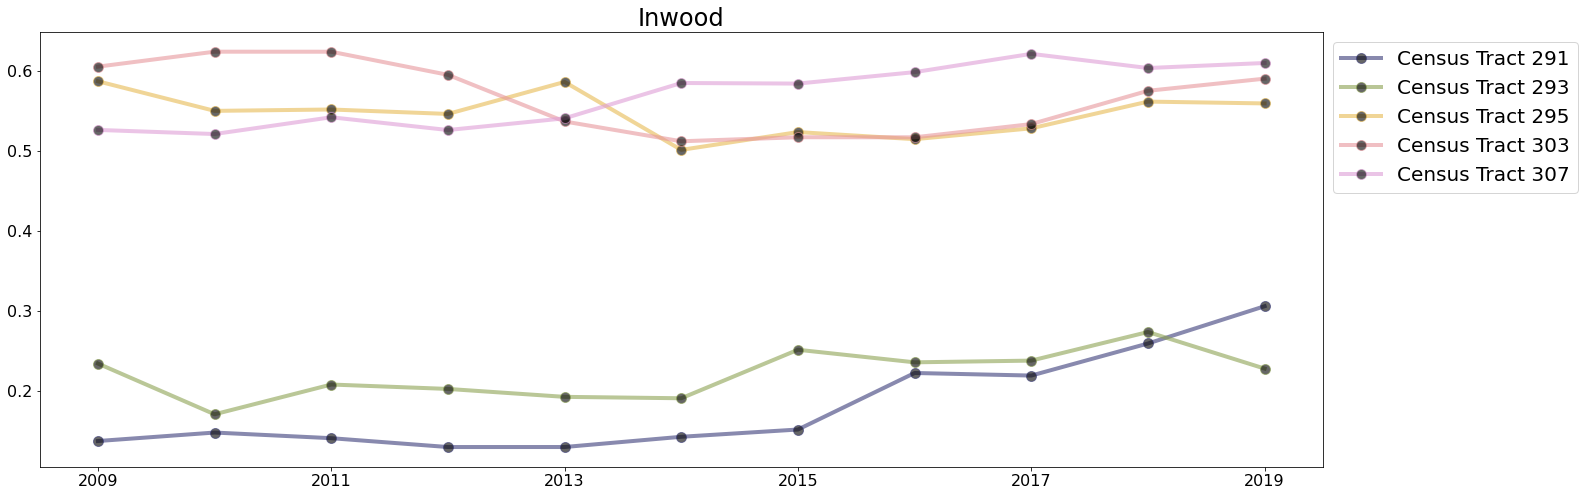

In [ ]:
inwood_DI_2009 = vars()['inwood_di_2009'][['NAME' , 'DI']]
inwood_DI_2010 = vars()['inwood_di_2010'][['NAME' , 'DI']]

inwood_DI = inwood_DI_2009.merge(inwood_DI_2010, left_on = 'NAME', right_on = 'NAME')
inwood_DI.rename(columns={'DI_x':2009,'DI_y':2010}, inplace=True)

y = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in y:
  DI_name = 'inwood_di_' + i
  Diver_index = vars()[DI_name][['NAME','DI']]
  DI_year = i

  inwood_DI = inwood_DI.merge(Diver_index, left_on = 'NAME', right_on = 'NAME')
  inwood_DI.rename(columns={'DI': DI_year}, inplace=True)

for index in range(len(inwood_DI)):
  inwood_DI['NAME'] = inwood_DI['NAME'].astype('string')
  txt = inwood_DI['NAME'].values[index]
  new_Name = txt.split(',')
  inwood_DI['NAME'] = inwood_DI['NAME'].replace(txt, new_Name[0])
  
#inwood_DI.plot.bar(figsize=(15,5))
transposed = inwood_DI.set_index('NAME').transpose()
transposed.plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 20, bbox_to_anchor=(1.0, 1.0))
plt.title("Inwood",fontsize = 24)


Rockaway


Text(0.5, 1.0, 'Rockaway')

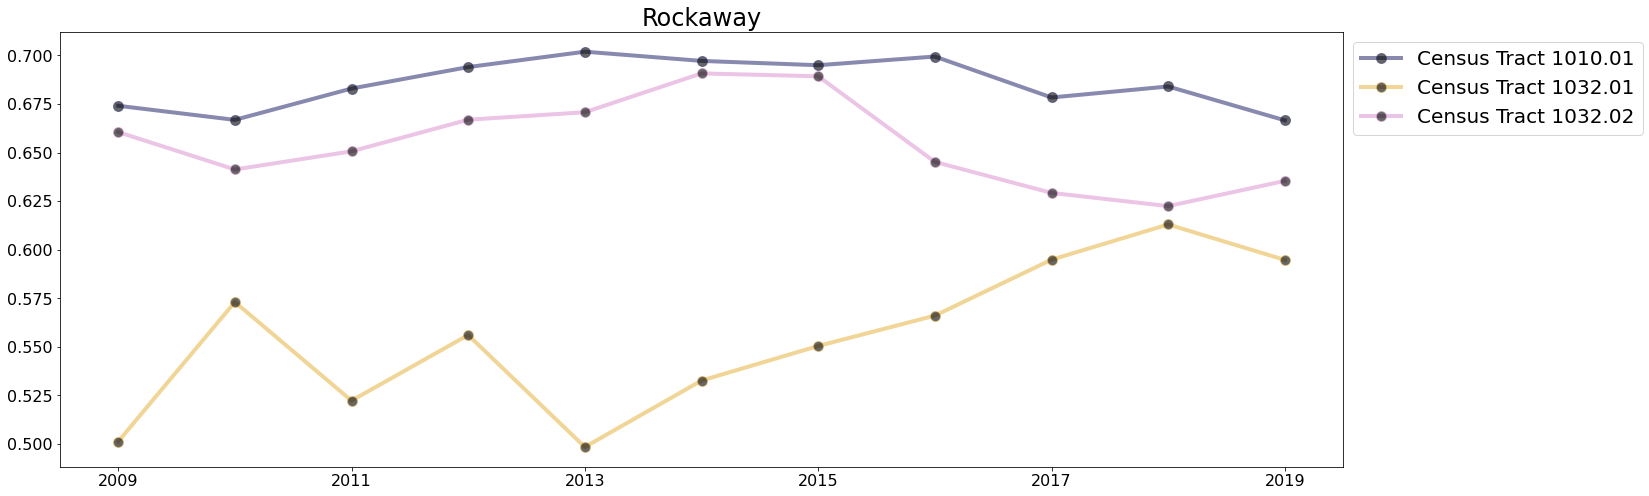

In [ ]:
rockaway_DI_2009 = vars()['rockaway_di_2009'][['NAME' , 'DI']]
rockaway_DI_2010 = vars()['rockaway_di_2010'][['NAME' , 'DI']]

rockaway_DI = rockaway_DI_2009.merge(rockaway_DI_2010, left_on = 'NAME', right_on = 'NAME')
rockaway_DI.rename(columns={'DI_x':2009,'DI_y':2010}, inplace=True)

y = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in y:
  DI_name = 'rockaway_di_' + i
  Diver_index = vars()[DI_name][['NAME','DI']]
  DI_year = i

  rockaway_DI = rockaway_DI.merge(Diver_index, left_on = 'NAME', right_on = 'NAME')
  rockaway_DI.rename(columns={'DI': DI_year}, inplace=True)

for index in range(len(rockaway_DI)):
  rockaway_DI['NAME'] = rockaway_DI['NAME'].astype('string')
  txt = rockaway_DI['NAME'].values[index]
  new_Name = txt.split(',')
  rockaway_DI['NAME'] = rockaway_DI['NAME'].replace(txt, new_Name[0])
  
#rockaway_DI.plot.bar(figsize=(10,5))
transposed = rockaway_DI.set_index('NAME').transpose()
transposed.plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 20, bbox_to_anchor=(1.0, 1.0))
plt.title("Rockaway",fontsize = 24)

Jerome

Text(0.5, 1.0, 'Jerome')

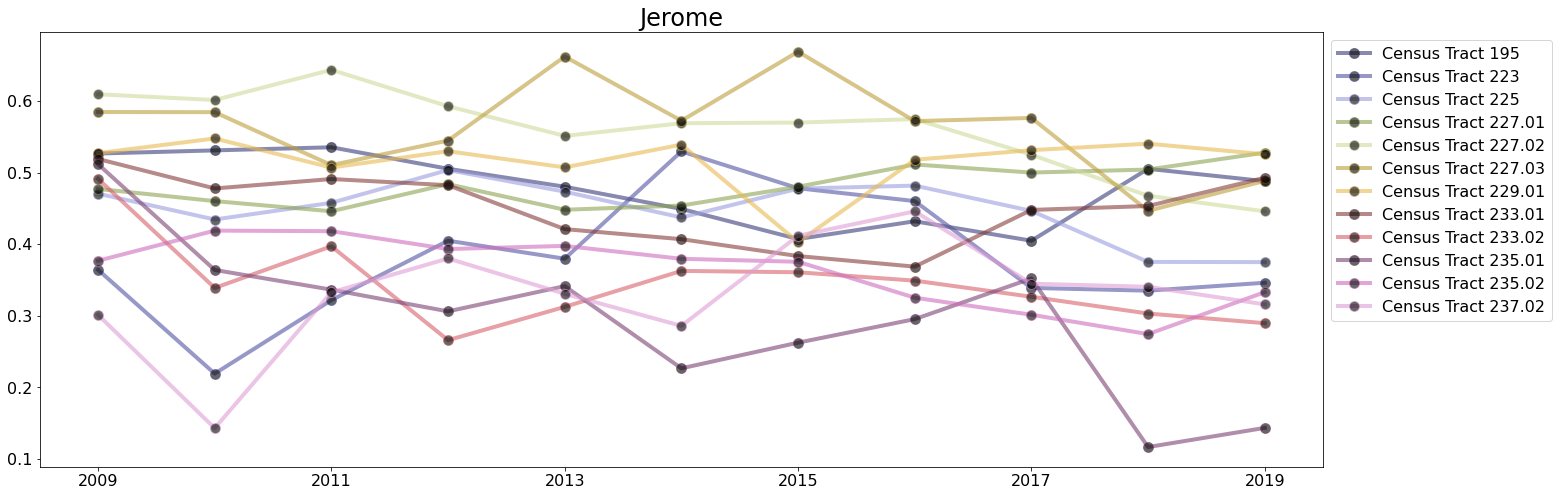

In [ ]:
jerome_DI_2009 = vars()['jerome_di_2009'][['NAME' , 'DI']]
jerome_DI_2010 = vars()['jerome_di_2010'][['NAME' , 'DI']]

jerome_DI = jerome_DI_2009.merge(jerome_DI_2010, left_on = 'NAME', right_on = 'NAME')
jerome_DI.rename(columns={'DI_x':2009,'DI_y':2010}, inplace=True)

y = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in y:
  DI_name = 'jerome_di_' + i
  Diver_index = vars()[DI_name][['NAME','DI']]
  DI_year = i

  jerome_DI = jerome_DI.merge(Diver_index, left_on = 'NAME', right_on = 'NAME')
  jerome_DI.rename(columns={'DI': DI_year}, inplace=True)

for index in range(len(jerome_DI)):
  jerome_DI['NAME'] = jerome_DI['NAME'].astype('string')
  txt = jerome_DI['NAME'].values[index]
  new_Name = txt.split(',')
  jerome_DI['NAME'] = jerome_DI['NAME'].replace(txt, new_Name[0])
  
#jerome_DI.plot.bar(figsize=(24,9))
transposed = jerome_DI.set_index('NAME').transpose()
transposed.plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 16, bbox_to_anchor=(1.0, 1.0))
plt.title("Jerome",fontsize = 24)
#Census tract 235.01 is the biggest drop

East_Harlem

Text(0.5, 1.0, 'East Harlem')

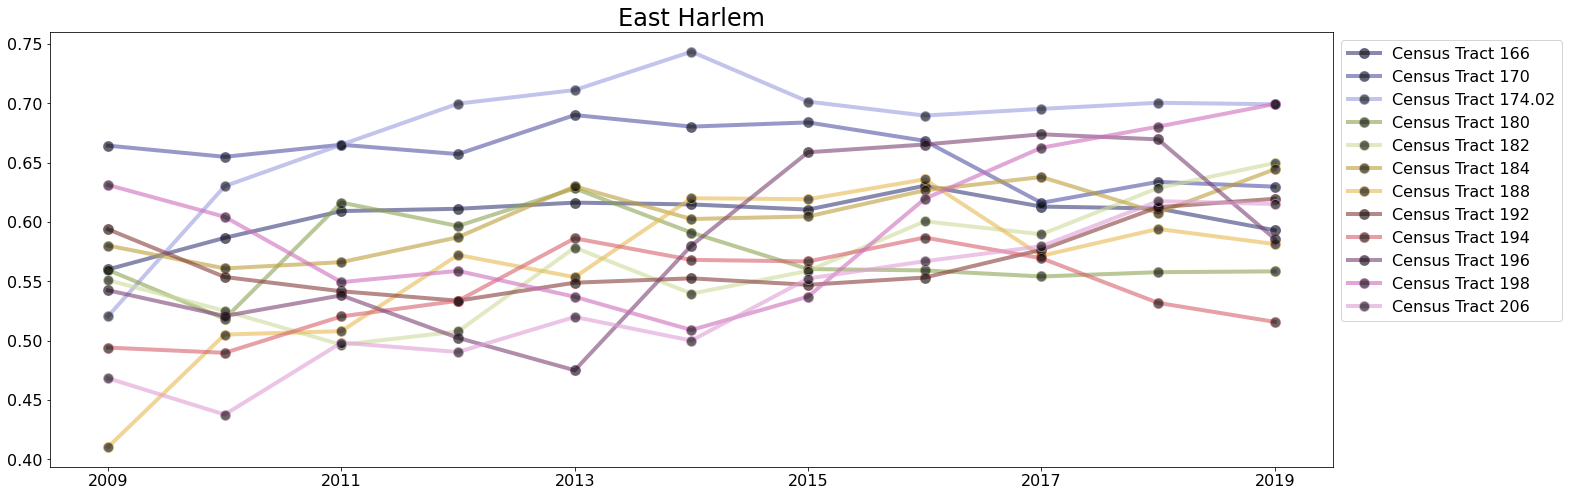

In [ ]:
east_harlem_DI_2009 = vars()['east_harlem_di_2009'][['NAME' , 'DI']]
east_harlem_DI_2010 = vars()['east_harlem_di_2010'][['NAME' , 'DI']]

east_harlem_DI = east_harlem_DI_2009.merge(east_harlem_DI_2010, left_on = 'NAME', right_on = 'NAME')
east_harlem_DI.rename(columns={'DI_x':2009,'DI_y':2010}, inplace=True)

y = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in y:
  DI_name = 'east_harlem_di_' + i
  Diver_index = vars()[DI_name][['NAME','DI']]
  DI_year = i

  east_harlem_DI = east_harlem_DI.merge(Diver_index, left_on = 'NAME', right_on = 'NAME')
  east_harlem_DI.rename(columns={'DI': DI_year}, inplace=True)

for index in range(len(east_harlem_DI)):
  east_harlem_DI['NAME'] = east_harlem_DI['NAME'].astype('string')
  txt = east_harlem_DI['NAME'].values[index]
  new_Name = txt.split(',')
  east_harlem_DI['NAME'] = east_harlem_DI['NAME'].replace(txt, new_Name[0])

#east_harlem_DI.plot.bar(figsize=(25,8))
transposed = east_harlem_DI.set_index('NAME').transpose()
transposed.plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 16,  bbox_to_anchor=(1.0, 1.0))
plt.title("East Harlem",fontsize = 24)

Bay

Text(0.5, 1.0, 'Bay Street')

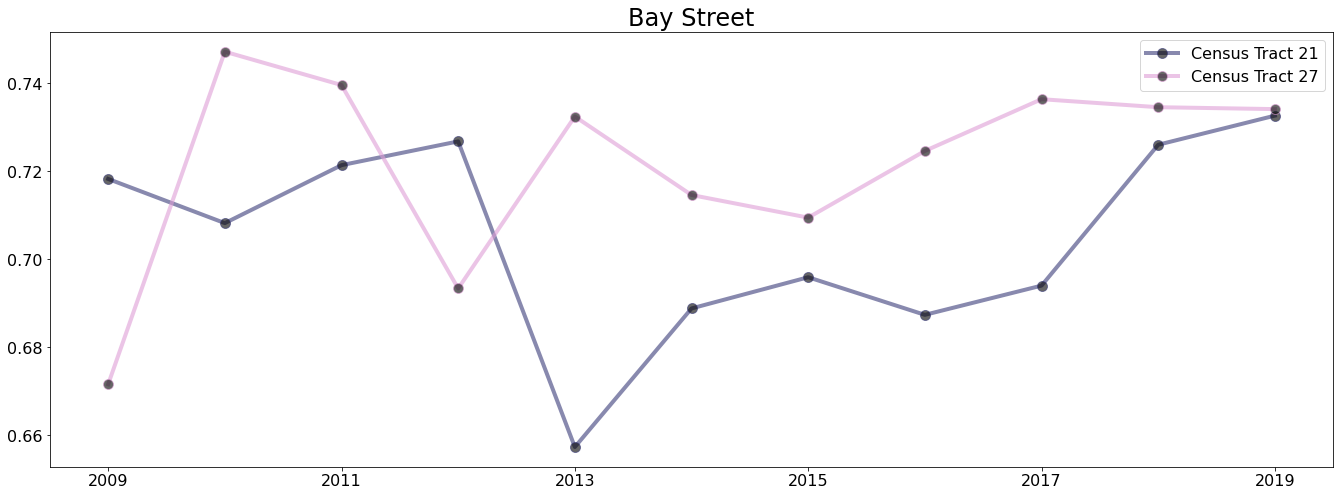

In [ ]:
bay_DI_2009 = vars()['bay_di_2009'][['NAME' , 'DI']]
bay_DI_2010 = vars()['bay_di_2010'][['NAME' , 'DI']]

bay_DI = bay_DI_2009.merge(bay_DI_2010, left_on = 'NAME', right_on = 'NAME')
bay_DI.rename(columns={'DI_x':2009,'DI_y':2010}, inplace=True)

y = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in y:
  DI_name = 'bay_di_' + i
  Diver_index = vars()[DI_name][['NAME','DI']]
  DI_year = i

  bay_DI = bay_DI.merge(Diver_index, left_on = 'NAME', right_on = 'NAME')
  bay_DI.rename(columns={'DI': DI_year}, inplace=True)

for index in range(len(bay_DI)):
  bay_DI['NAME'] = bay_DI['NAME'].astype('string')
  txt = bay_DI['NAME'].values[index]
  new_Name = txt.split(',')
  bay_DI['NAME'] = bay_DI['NAME'].replace(txt, new_Name[0])
  
#bay_DI.plot.bar(figsize=(8,5))
transposed = bay_DI.set_index('NAME').transpose()
transposed.plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 16,  bbox_to_anchor=(1.0, 1.0))
plt.title("Bay Street",fontsize = 24)

East_NY

Text(0.5, 1.0, 'East New York')

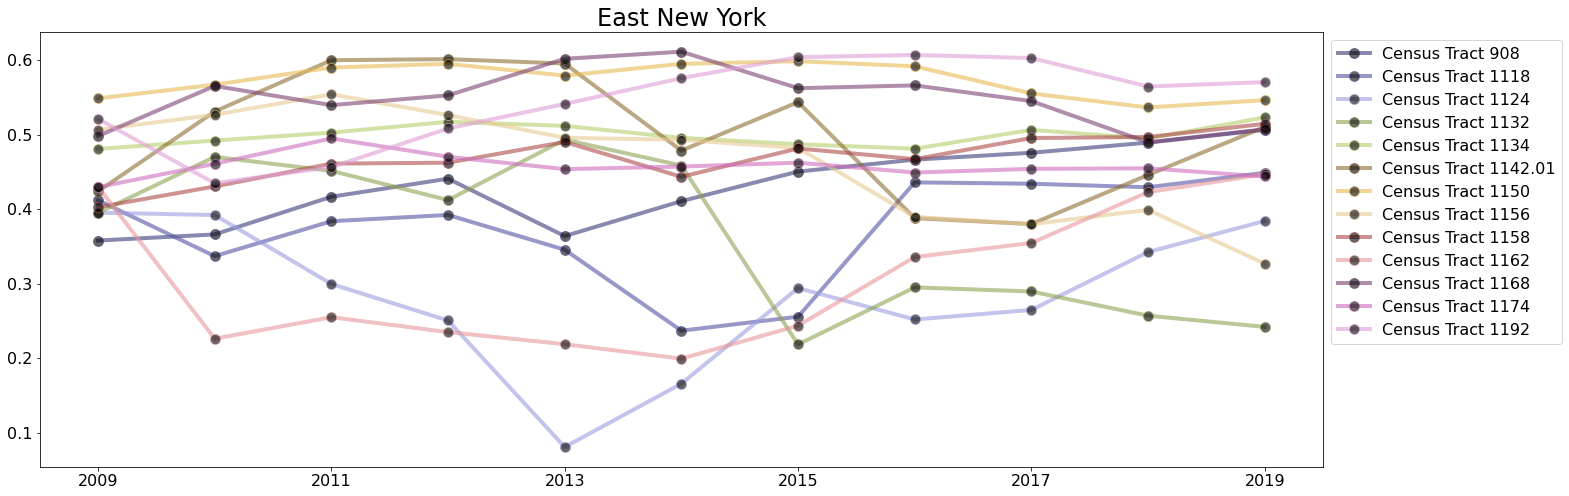

In [ ]:
east_ny_2009 = vars()['east_ny_di_2009'][['NAME' , 'DI']]
east_ny_2010 = vars()['east_ny_di_2010'][['NAME' , 'DI']]

east_ny_DI = east_ny_2009.merge(east_ny_2010, left_on = 'NAME', right_on = 'NAME')
east_ny_DI.rename(columns={'DI_x':2009,'DI_y':2010}, inplace=True)

y = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in y:
  DI_name = 'east_ny_di_' + i
  Diver_index = vars()[DI_name][['NAME','DI']]
  DI_year = i

  east_ny_DI = east_ny_DI.merge(Diver_index, left_on = 'NAME', right_on = 'NAME')
  east_ny_DI.rename(columns={'DI': DI_year}, inplace=True)

for index in range(len(east_ny_DI)):
  east_ny_DI['NAME'] = east_ny_DI['NAME'].astype('string')
  txt = east_ny_DI['NAME'].values[index]
  new_Name = txt.split(',')
  east_ny_DI['NAME'] = east_ny_DI['NAME'].replace(txt, new_Name[0])
  
#east_ny_DI.plot.bar(figsize=(24,8))
transposed = east_ny_DI.set_index('NAME').transpose()
transposed.plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 16,  bbox_to_anchor=(1.0, 1.0))
plt.title("East New York",fontsize = 24)

Gowanus

Text(0.5, 1.0, 'Gowanus')

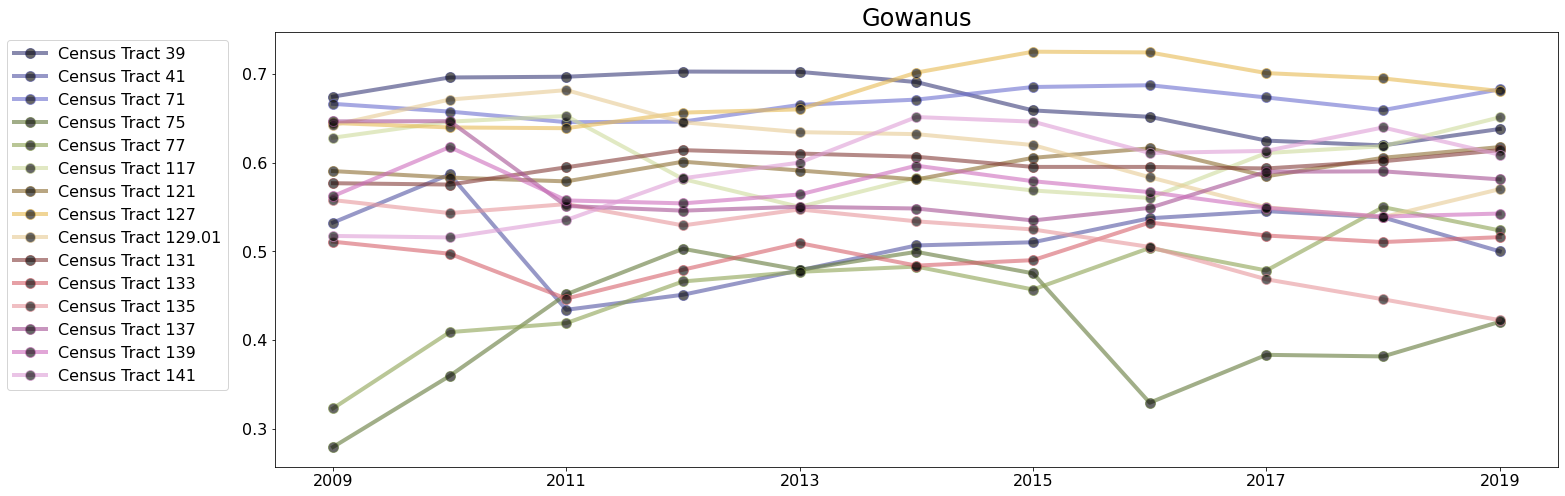

In [ ]:
gowanus_DI_2009 = vars()['gowanus_di_2009'][['NAME' , 'DI']]
gowanus_DI_2010 = vars()['gowanus_di_2010'][['NAME' , 'DI']]

gowanus_DI = gowanus_DI_2009.merge(gowanus_DI_2010, left_on = 'NAME', right_on = 'NAME')
gowanus_DI.rename(columns={'DI_x':2009,'DI_y':2010}, inplace=True)

y = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in y:
  DI_name = 'gowanus_di_' + i
  Diver_index = vars()[DI_name][['NAME','DI']]
  DI_year = i

  gowanus_DI = gowanus_DI.merge(Diver_index, left_on = 'NAME', right_on = 'NAME')
  gowanus_DI.rename(columns={'DI': DI_year}, inplace=True)

for index in range(len(gowanus_DI)):
  gowanus_DI['NAME'] = gowanus_DI['NAME'].astype('string')
  txt = gowanus_DI['NAME'].values[index]
  new_Name = txt.split(',')
  gowanus_DI['NAME'] = gowanus_DI['NAME'].replace(txt, new_Name[0])
  
#gowanus_DI.plot.line(figsize=(23,8))
transposed = gowanus_DI.set_index('NAME').transpose()
transposed.plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 16,  bbox_to_anchor=(-0.03, 1.0))
plt.title("Gowanus",fontsize = 24)
#Biggest change is Census tract 141

#Education Index Plot



In [ ]:
# Rename the df


# 59E(less than high school), 60E(some high school), 61E(High school graduate), 62E(Some college), 
# 63E(Associate's degree), 64E(Bachelor's degree), 65E(Graduate / professional degree),67:'Percent bachelor\'s degree or higher'
for i in neigh_name:
  for j in ['2009', '2010', '2011', '2012','2013', '2014', '2015', '2016','2017', '2018']:
    vars()[i + '_ei_' + j].rename(columns={'DP02_0059PE':'Less than High School','DP02_0060PE':'some high school',
                  'DP02_0061PE':'High school graduate','DP02_0062PE':'Some college',
                  'DP02_0063PE':'Associate\'s degree','DP02_0064PE':'Bachelor\'s degree',
                  'DP02_0065PE':'Graduate or professional degree'}, inplace=True)
  vars()[i + '_ei_2019'].rename(columns={'DP02_0060PE':'Less than High School','DP02_0061PE':'some high school',
                  'DP02_0062PE':'High school graduate','DP02_0063PE':'Some college',
                  'DP02_0064PE':'Associate\'s degree','DP02_0065PE':'Bachelor\'s degree',
                  'DP02_0066PE':'Graduate or professional degree'}, inplace=True)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
vars()['inwood_ei_2019']

,NAME,Less than High School,some high school,High school graduate,Some college,Associate's degree,Bachelor's degree,Graduate or professional degree
1622,"Census Tract 299, New York County, New York",25.0,16.1,17.5,13.6,8.4,14.9,4.7
2398,"Census Tract 303, New York County, New York",6.1,11.6,9.4,15.1,7.1,29.8,20.9
2399,"Census Tract 307, New York County, New York",1.1,1.9,15.4,12.4,3.8,31.2,34.2
4180,"Census Tract 293, New York County, New York",20.8,11.7,23.9,19.3,5.8,10.9,7.7
4825,"Census Tract 291, New York County, New York",17.1,12.8,22.2,17.4,7.7,17.0,5.8
4826,"Census Tract 295, New York County, New York",17.9,6.3,12.6,10.8,2.9,26.0,23.4


In [ ]:
# Generate EI data

y = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']

for i in range(len(neigh_name)):
  EI_2009 = vars()[neigh_name[i] + '_ei_' + '2009'].set_index('NAME').astype('float64').mean()
  EI_2009 = EI_2009.to_frame()
  EI_2009.rename(columns={0:'2009'}, inplace=True)

  EI_2010 = vars()[neigh_name[i] + '_ei_' + '2010'].set_index('NAME').astype('float64').mean()
  EI_2010 = EI_2010.to_frame()
  EI_2010.rename(columns={0:'2010'}, inplace=True)
  
  Ulti_EI = pd.concat([EI_2009, EI_2010.reindex(EI_2009.index)], axis=1)

  for j in y:
    EI_name = neigh_name[i] + '_ei_' + j
    Diver_index = vars()[EI_name].set_index('NAME').astype('float64').mean()
    Diver_index = Diver_index.to_frame()
    Diver_index.rename(columns={0: j}, inplace=True)
  
    Ulti_EI = pd.concat([Ulti_EI, Diver_index.reindex(Ulti_EI.index)], axis=1)

  
  vars()[neigh_name[i] + '_EI'] = Ulti_EI

# Example: vars()['gowanus_EI']
# 'inwood_EI', 'rockaway_EI', 'jerome_EI', 'east_harlem_EI', 'bay_EI', 'east_ny_EI', 'gowanus_EI'

In [ ]:
Ulti_EI.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,,,,,,,,,,,
Less than High School,7.013333,6.50625,6.25625,6.01875,5.2125,5.53750,5.25625,5.13125,4.97500,4.88125,4.78125
some high school,8.240000,9.15000,8.01875,7.50000,7.3375,6.45000,5.95000,6.20625,5.86250,5.79375,5.35625
High school graduate,14.533333,13.70625,12.53750,13.26250,13.4625,12.75625,11.75625,11.48125,10.98125,10.72500,9.98125
Some college,9.660000,10.82500,10.39375,10.36250,10.1250,10.05625,8.83125,7.96250,7.75000,7.74375,7.13125
Associate's degree,5.013333,4.50625,3.99375,3.81875,3.5750,3.45000,3.35000,3.47500,3.38125,3.44375,3.47500


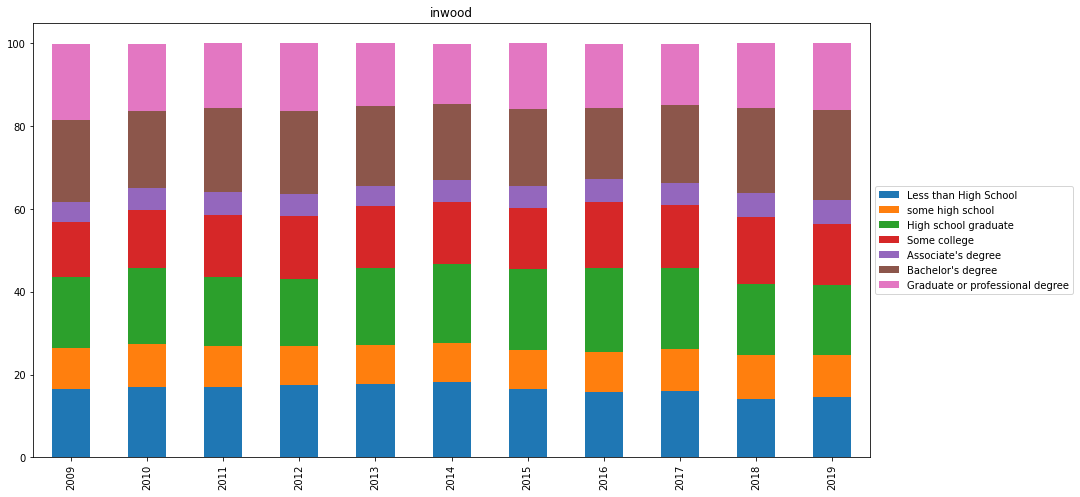

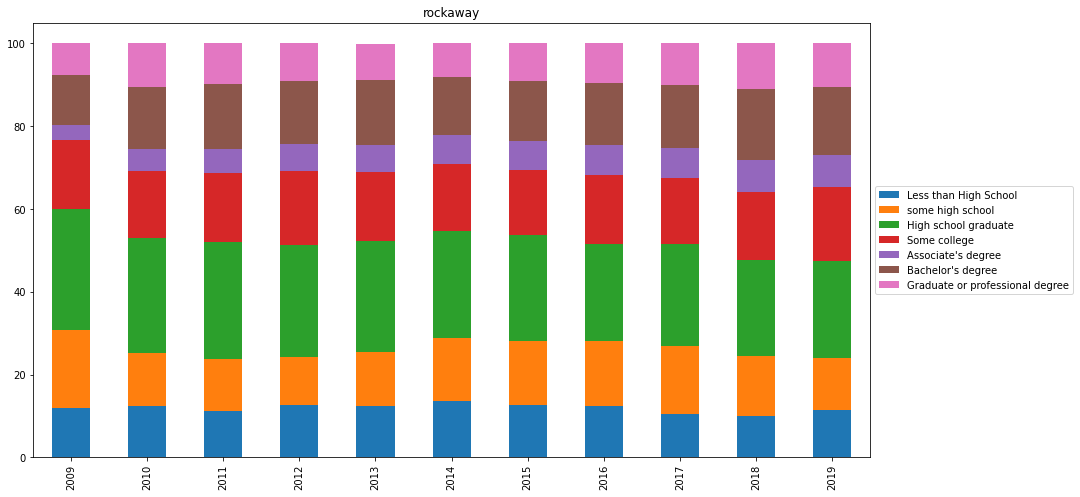

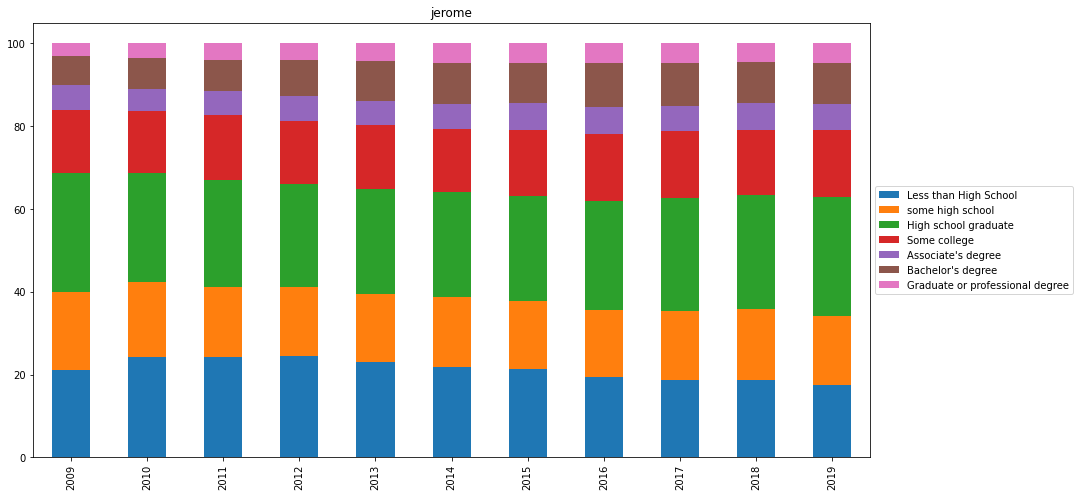

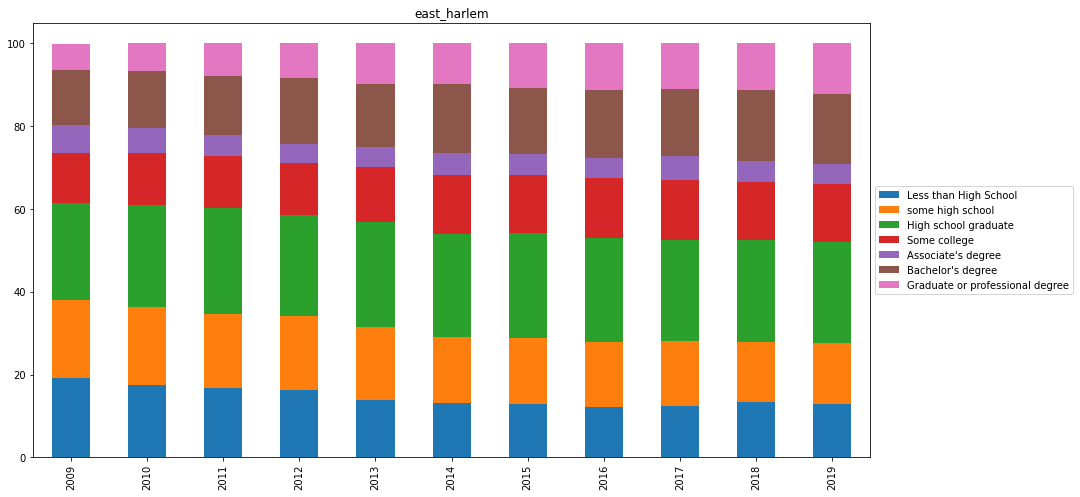

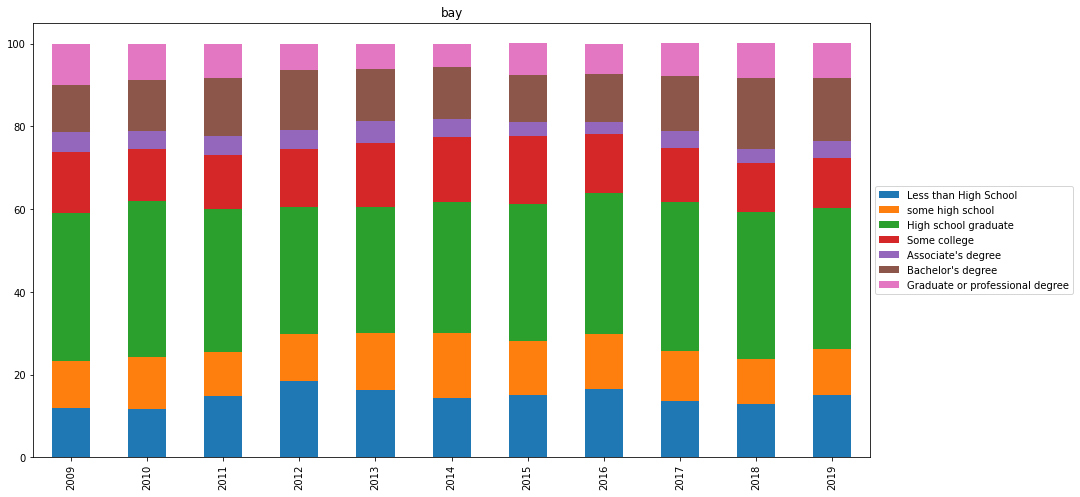

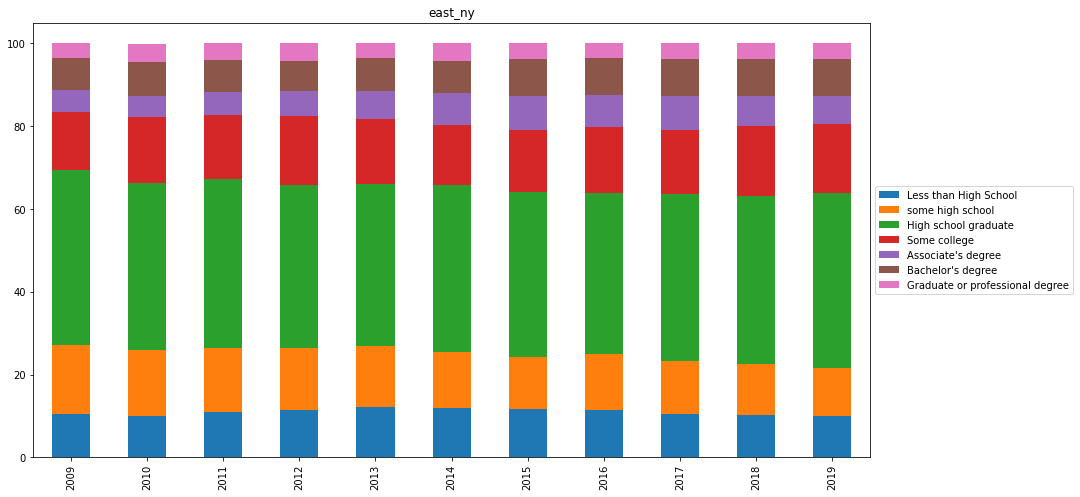

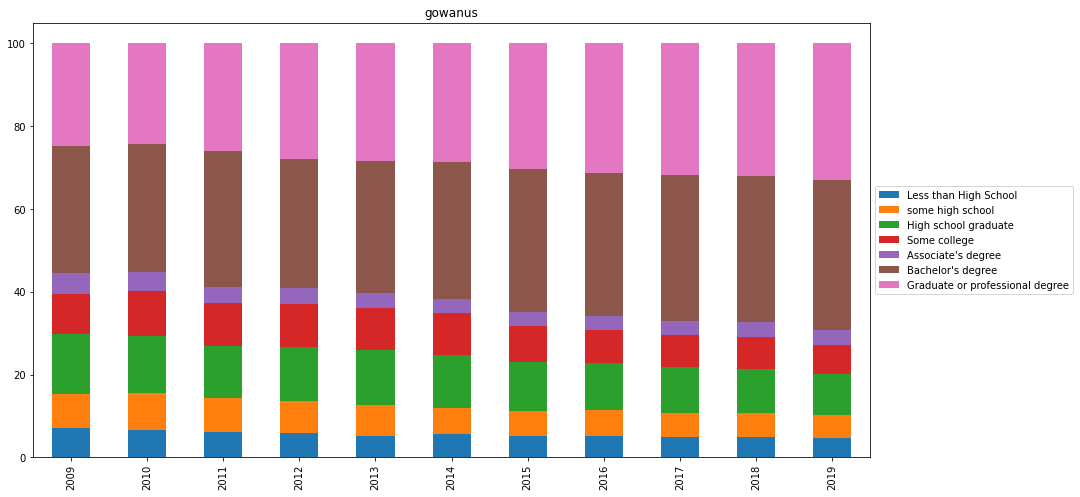

In [ ]:
# Plot for all

for i in neigh_name:
  vars()[i + '_EI'].transpose().plot.bar(stacked = True, figsize = (15,8),
                                         title = i).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [ ]:
# Auto Diversity Index and Filtering WORKS!
# inwood_di_2009.head()
# inwood_di_2019.head()
# bay_di_2009.head()
#bay_di_2019.head()

# Rolling Sales Data

In [ ]:
import glob
salesdata = pd.DataFrame()

In [ ]:
for year in range(2009,2018):
  
  path = '/content/Urban_Rezoning_Displacement/Resources/Data/Housing '+str(year)+'/*.xls'
  
  if (year < 2011):
    for f in glob.glob(path):
      df = pd.read_excel(f, sheet_name=None, skiprows=3)
      cdf = pd.concat(df.values())
      cdf['id'] = year
      salesdata = salesdata.append(cdf,ignore_index=True)
  else:
    for f in glob.glob(path):
      df = pd.read_excel(f, sheet_name=None, skiprows=4)
      cdf = pd.concat(df.values())
      cdf.columns = [col.replace('\n','') for col in cdf.columns]
      cdf['id'] = year
      salesdata = salesdata.append(cdf,ignore_index=True)

In [ ]:
for year in range(2018,2020):
  
  path = '/content/Urban_Rezoning_Displacement/Resources/Data/Housing '+str(year)+'/*.xlsx'
  
  for f in glob.glob(path):
    df = pd.read_excel(f, sheet_name=None, skiprows=4)
    cdf = pd.concat(df.values())
    cdf.columns = [col.replace('\n','') for col in cdf.columns]
    cdf['id'] = year
    salesdata = salesdata.append(cdf,ignore_index=True)

In [ ]:
salesdata.shape

(917912, 26)

In [ ]:
salesdata['id'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
selectcolumns = ['BOROUGH','NEIGHBORHOOD','ADDRESS','ZIP CODE','GROSS SQUARE FEET','SALE PRICE','id']
salesdata = salesdata[selectcolumns]
salesdata = salesdata[(salesdata['GROSS SQUARE FEET']>=300) & (salesdata['GROSS SQUARE FEET']<=1e5) & (salesdata['SALE PRICE'] >= 1e4) & (salesdata['SALE PRICE'] <= 5e8)]

In [ ]:
salesdata.shape
#should be (295720, 7)

(295720, 7)

In [ ]:
sd_filt = salesdata.copy()

In [ ]:
zip_tract = pd.read_csv('/content/Urban_Rezoning_Displacement/Resources/Data/tract_zip_NY.csv')

In [ ]:
years = ['2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016',
         '2017', '2018', '2019']
neigh_name = ['inwood', 'rockaway', 'jerome', 'east_harlem', 'bay', 'east_ny', 'gowanus']

tracts = []
for i in years:
  for j in range(len(neigh_name)):
    name_str = neigh_name[j] + '_di_' + i
    tracts.append(vars()[name_str].GEO_ID.unique())
new_tract = [tract for sublist in tracts for tract in sublist]
new_tract = list(set(new_tract))
tract_num = []
for i in new_tract:
  tract_num.append(int(i.split('S')[1])) 

In [ ]:
zip_for_filt = zip_tract[zip_tract.TRACT.isin(tract_num)]
zip_for_filt.reset_index(inplace=True, drop = True)
zip_for_filt

,TRACT,ZIP
0,36001002100,12208
1,36001002100,12209
2,36001002100,12202
3,36001002100,12210
4,36005003900,10454
...,...,...
101,36081100802,11691
102,36081101001,11691
103,36081103201,11691
104,36081103202,11559


In [ ]:
sd_filt.head()

,BOROUGH,NEIGHBORHOOD,ADDRESS,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,id
0,5,ANNADALE,4 EDWIN STREET,10312.0,2230.0,810000,2009
1,5,ANNADALE,531 SYCAMORE STREET,10312.0,3016.0,930000,2009
2,5,ANNADALE,18 SANDBORN STREET,10312.0,1716.0,425880,2009
4,5,ANNADALE,37 JANSEN STREET,10312.0,3344.0,940000,2009
6,5,ANNADALE,391 HAROLD AVENUE,10312.0,2862.0,640000,2009


In [ ]:
sd_filt = sd_filt[sd_filt['ZIP CODE'].isin(zip_for_filt.ZIP)]

In [ ]:
sd_filt.shape
#(28370, 7)

(28370, 7)

In [ ]:
def applyfunc(x):
    if x == 1:
        return 'Manhattan'
    elif x == 2:
        return 'Bronx'
    elif x == 3:
        return 'Brooklyn'
    elif x == 4:
        return 'Queens'
    else:
        return 'Staten Island'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
sd_filt['BOROUGH_NAME'] = sd_filt['BOROUGH'].apply(applyfunc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install censusgeocode

     |████████████████████████████████| 54 kB 1.8 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 3.6 MB 11.1 MB/s 


In [ ]:
sd_filt

In [ ]:
import censusgeocode as cg

temp_long=[]

for index, row in sd_filt.iterrows():
  formula = row['ADDRESS'].rstrip()+', '+row['BOROUGH_NAME']+', New York'
  result = cg.onelineaddress(formula,returntype='locations')
  try:
    temp_long.append(result[0]['coordinates']['x'])
  except IndexError:
    temp_long.append('')

KeyboardInterrupt: ignored

In [ ]:
temp_lat=[]

for index, row in salesdata.iterrows():
  formula = row['ADDRESS'].rstrip()+', '+row['BOROUGH_NAME']+', New York'
  result = cg.onelineaddress(formula,returntype='locations')
  try:
    temp_lat.append(result[0]['coordinates']['y'])
  except IndexError:
    temp_lat.append('')

ValueError: ignored

In [ ]:
salesdata['longitude'] = temp_long
salesdata['latitude'] = temp_lat

ValueError: ignored

In [ ]:
#basic format for getting point locations from rolling sales addresses addresses using census geocode
#data['longitude] = long
#data['latitude] = lat
#geodata = gpd.GeoDataFrame(data, crs=4326, geometry = gpd.points_from_xy(data.longitude, data.latitude))

# Tract to Geometry

In [ ]:
def tractgeometry(df):
  for i in range(df.shape[0]):
    df.GEO_ID.iloc[i] = df.GEO_ID.iloc[i].split('S')[1]
  df = df.merge(tract_shp, left_on = "GEO_ID", right_on = "GEOID")
  gdf = gpd.GeoDataFrame(df, geometry=df.geometry)
  return gdf 

In [ ]:
tract_shp = gpd.read_file('/content/Urban_Rezoning_Displacement/Resources/Data/Census Tact Shape File/tl_2021_36_tract.shp')
tract_shp.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,047,069601,36047069601,696.01,Census Tract 696.01,G5020,S,456923,47776,+40.6271699,-073.9153676,"POLYGON ((-73.91860 40.63210, -73.91692 40.631..."
1,36,047,069602,36047069602,696.02,Census Tract 696.02,G5020,S,688168,172866,+40.6227610,-073.9092489,"POLYGON ((-73.91747 40.62151, -73.91699 40.621..."
2,36,047,079801,36047079801,798.01,Census Tract 798.01,G5020,S,129680,0,+40.6600109,-073.9587186,"POLYGON ((-73.96077 40.66173, -73.95704 40.661..."
3,36,047,079802,36047079802,798.02,Census Tract 798.02,G5020,S,106366,0,+40.6579906,-073.9613711,"POLYGON ((-73.96281 40.66050, -73.96201 40.660..."
4,36,047,105801,36047105801,1058.01,Census Tract 1058.01,G5020,S,418443,0,+40.6492205,-073.8805957,"POLYGON ((-73.88550 40.65309, -73.88502 40.653..."


In [ ]:
for i in years :
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_di_' + i + '_shaped' # FORMAT: neighborhood_di_year_shaped
    vars()[df_name] = tractgeometry(vars()[neigh_name[j] + '_di_' + i]);

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

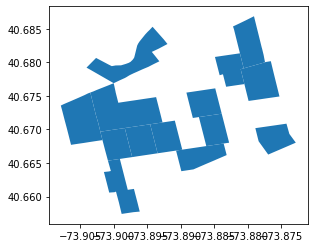

In [ ]:
east_ny_di_2015_shaped.plot()

# I Like Pies

In [ ]:
def getPie(neigh, year):
  total_pop = 'DP05_0001E'
  if(year < 2017):
    mapping = {
        "DP05_0066E": "Hispanic/Latino",
        "DP05_0072E": "White",
        "DP05_0073E": "Black",
        "DP05_0074E": "American Indian/Alaska Native",
        "DP05_0075E": "Asian",
        "DP05_0076E": "Native Hawaiian/Other Pacific Islander",
        "DP05_0077E": "Other Race",
        "DP05_0078E": "Two/More Race",
    }
  else:
    mapping = {
        "DP05_0071E": "Hispanic/Latino",
        "DP05_0077E": "White",
        "DP05_0078E": "Black",
        "DP05_0079E": "American Indian/Alaska Native",
        "DP05_0080E": "Asian",
        "DP05_0081E": "Native Hawaiian/Other Pacific Islander",
        "DP05_0082E": "Other Race",
        "DP05_0083E": "Two/More Race",
    }
  if(neigh.lower() != 'all'):
    neigh_name = [neigh]
  else:
    neigh_name = ['inwood', 'rockaway', 'jerome', 'east_harlem', 'bay', 'east_ny', 'gowanus']
  for name in neigh_name:
    pie_size = []
    selected = name + '_df_' + str(year)
    for race in mapping.keys():
      pie_size.append(globals()[selected][race].sum() / globals()[selected][total_pop].sum() * 100)
    fig, ax = plt.subplots(figsize=(20, 8), subplot_kw=dict(aspect="equal"))
    portion = ax.pie(pie_size, wedgeprops=dict(width=0.5), startangle=0)
    plt.axis('equal')
    value_list = list(mapping.values())
    custom_label = [f'{s:0.1f}%, {l}' for l, s in zip(value_list, pie_size)]
    plt.legend(
        labels=custom_label, 
        loc="upper left",
        fontsize=14)
    ax.text(
        0, 0, "Total Population\n" + str(globals()[selected][total_pop].sum()), 
        ha='center', fontsize=14)
    plt.title(name.upper() + ' - ' + str(year), pad=10, fontsize=16)
    plt.axhline(y = -1.25, color = 'black', linestyle = '-')
    plt.show()

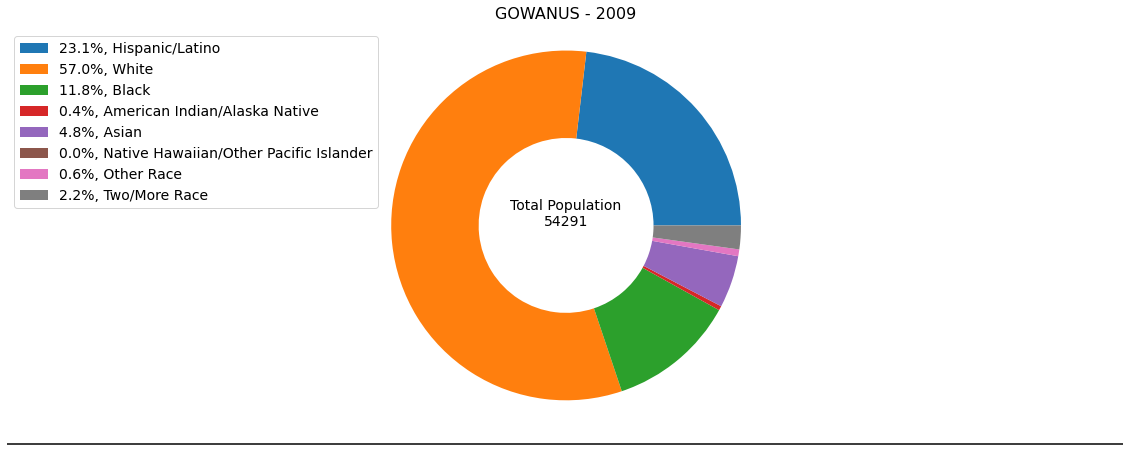

In [ ]:
# Everything works from 2009 to 2019, even with bullshit ACS labeling
getPie("gowanus", 2009) # Choose one neighborhood and year 

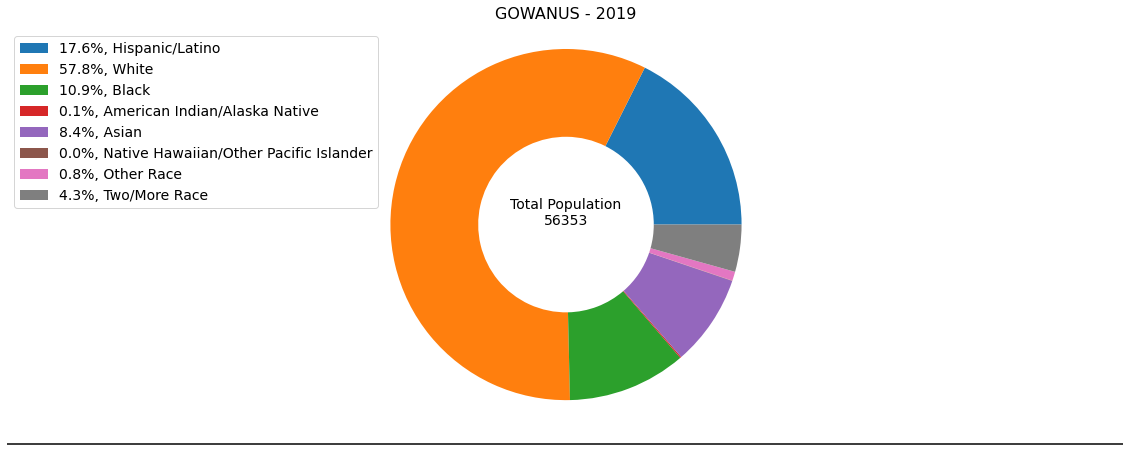

In [ ]:
getPie("gowanus", 2019) # Choose one neighborhood and year 

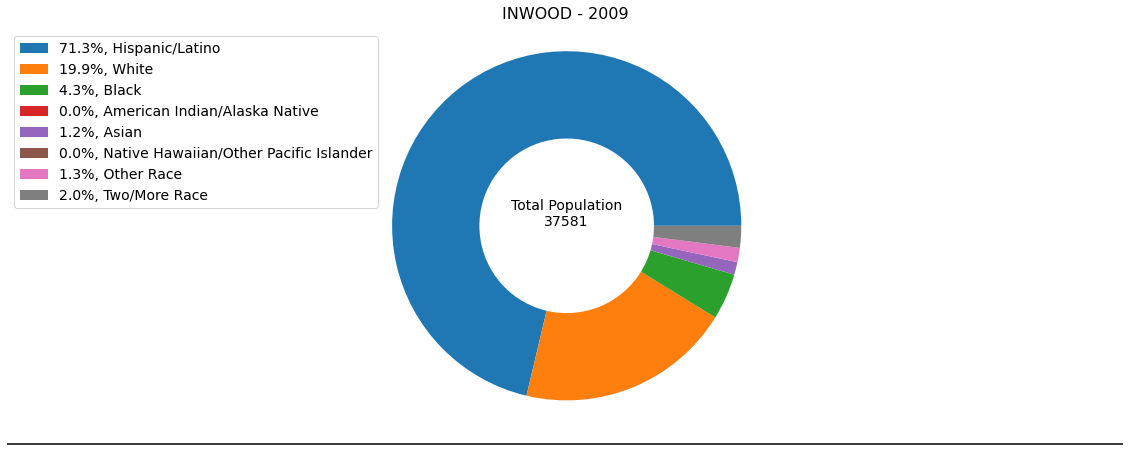

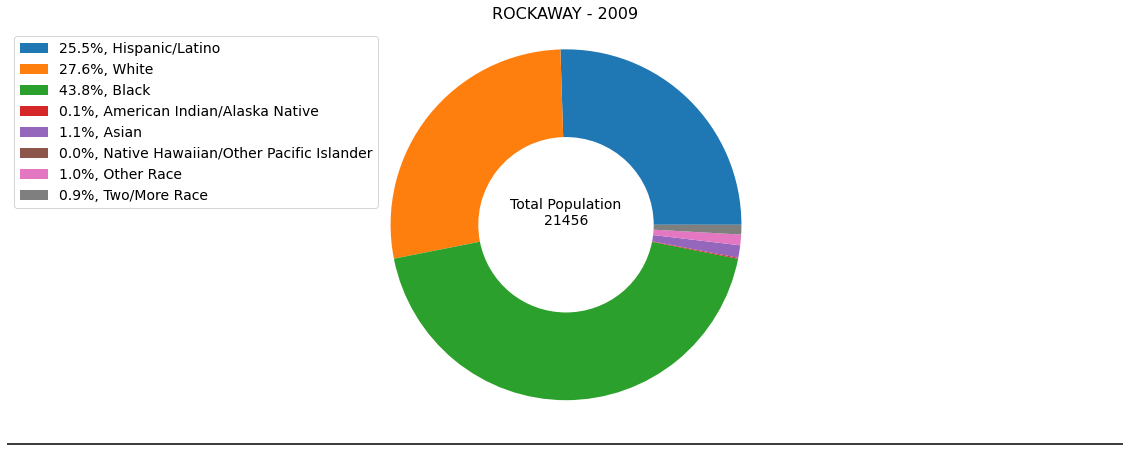

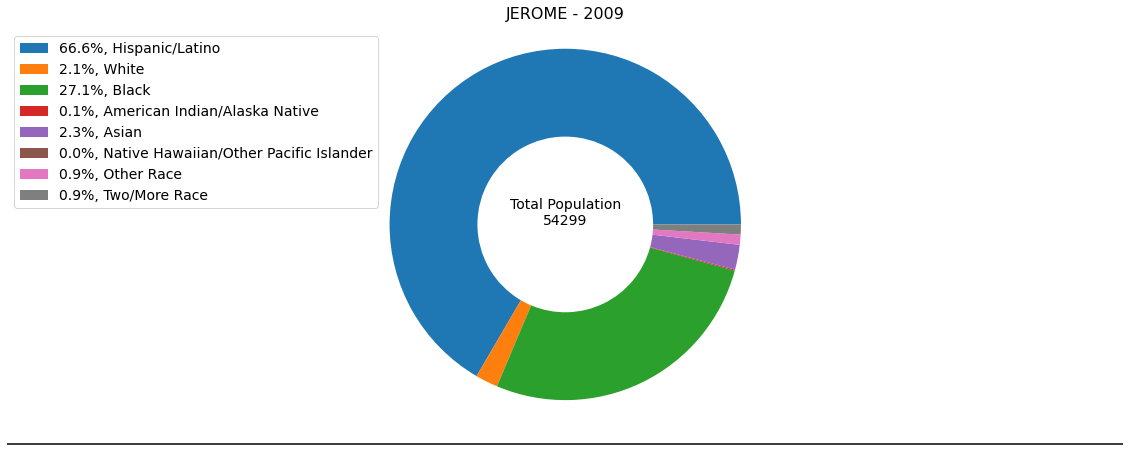

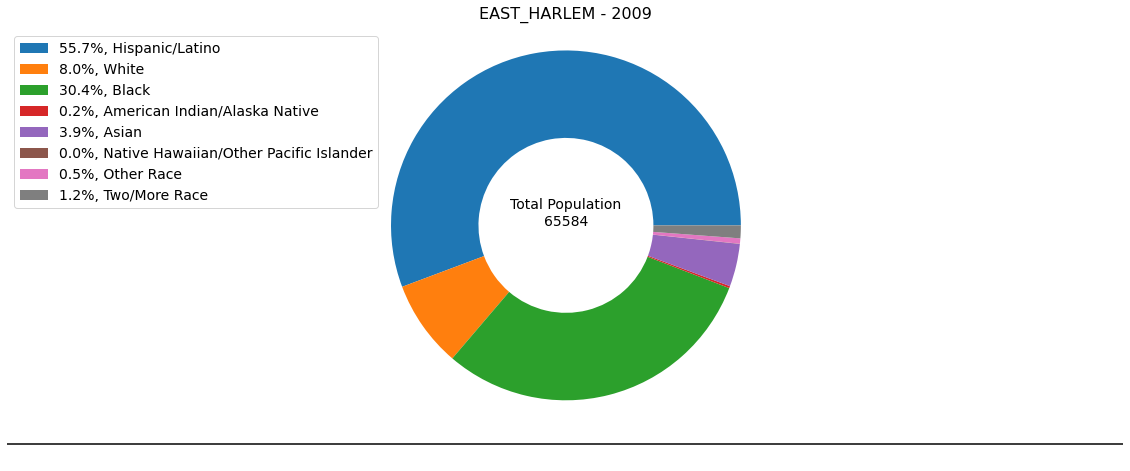

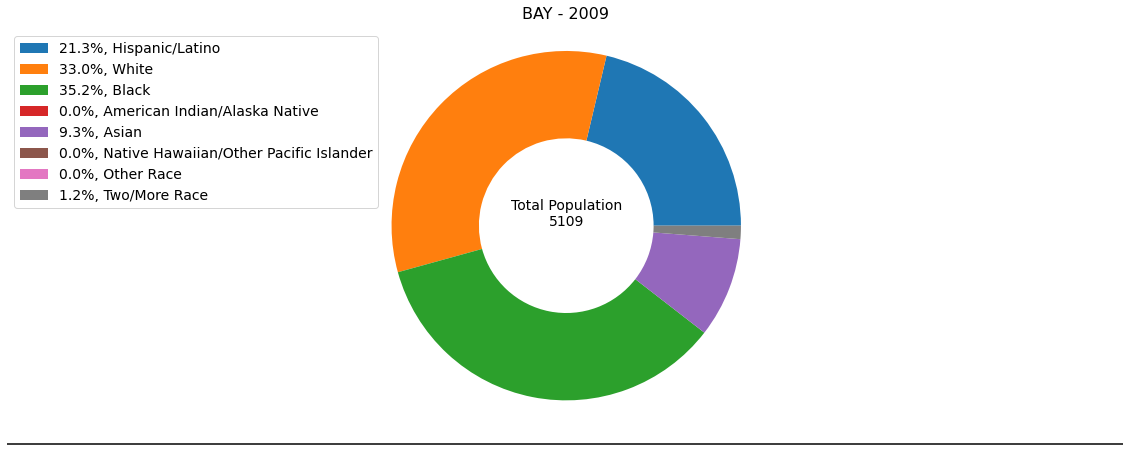

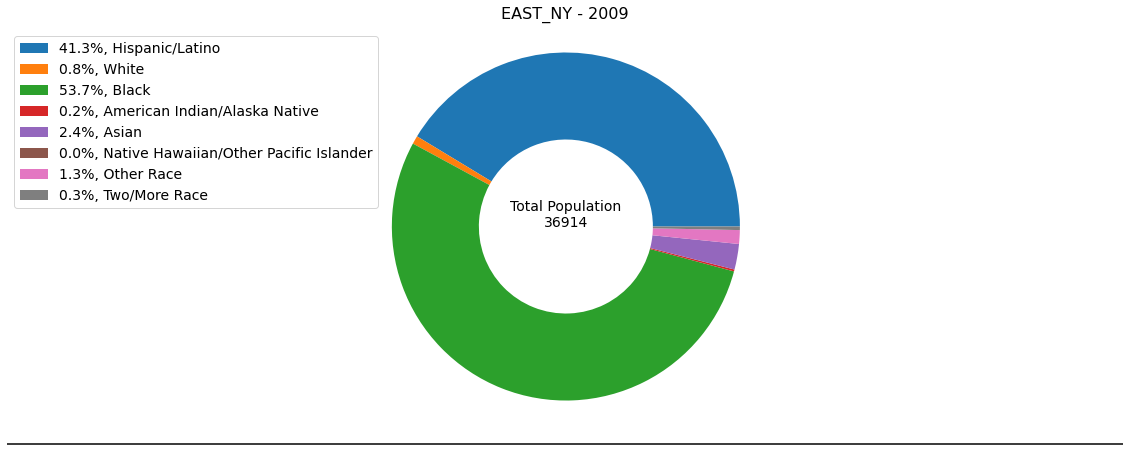

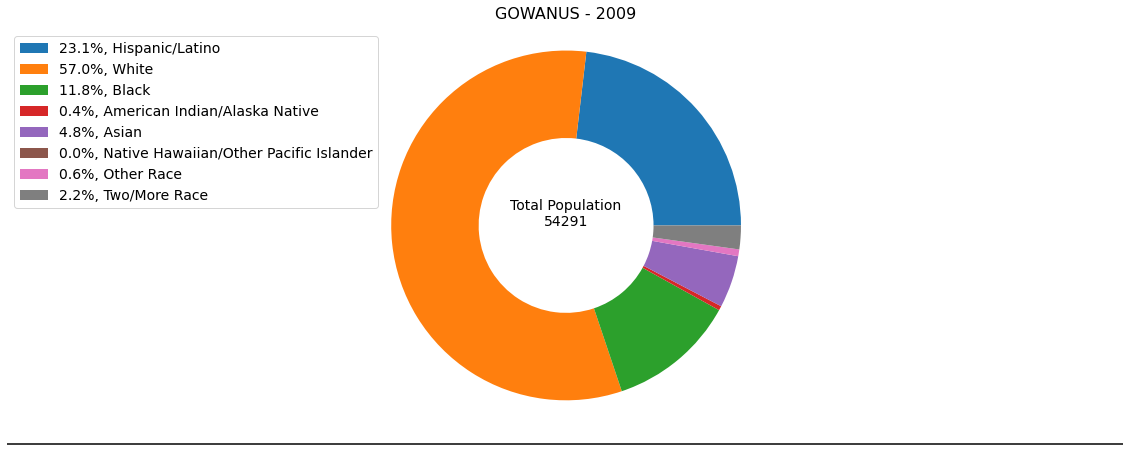

In [ ]:
# Didn't want to show every single year because that will just further clutter everything!
getPie("all", 2009) # Show "all" neighborhood and select one year

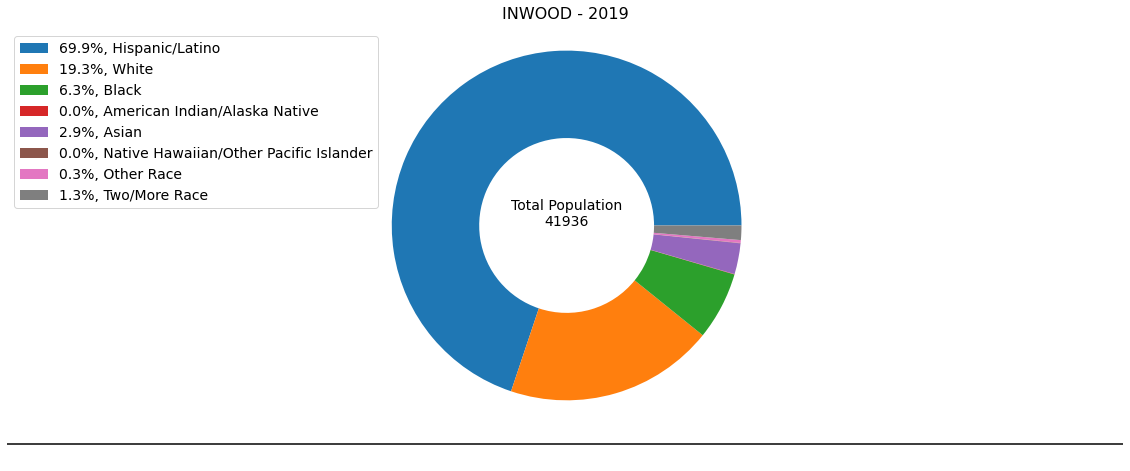

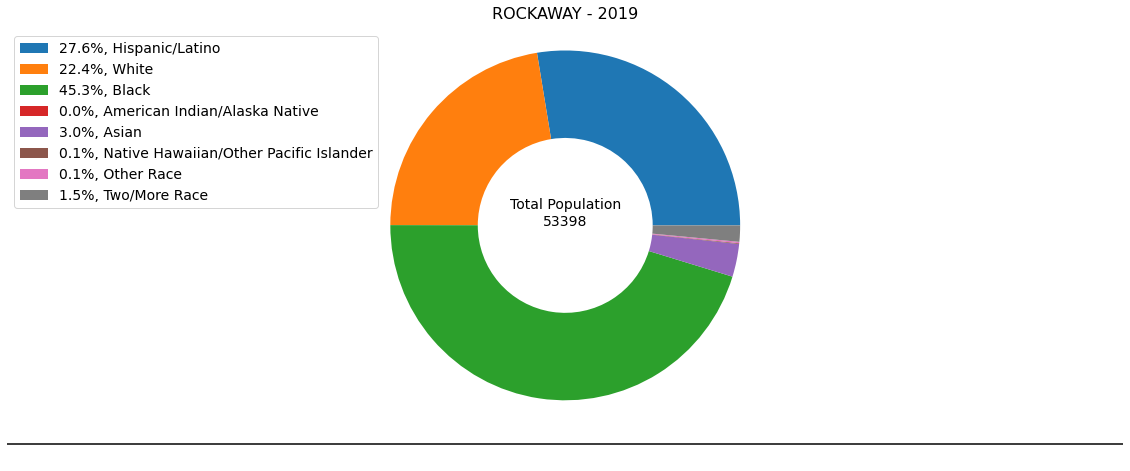

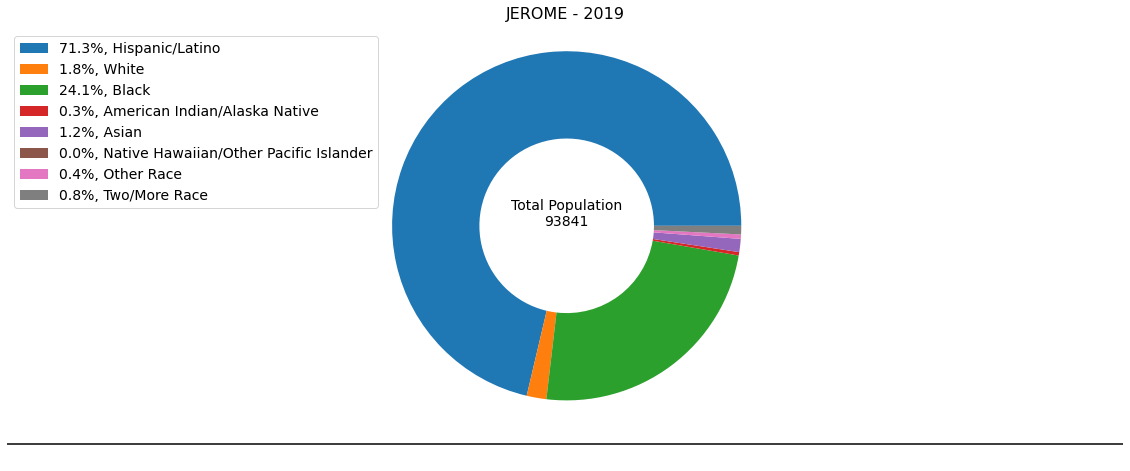

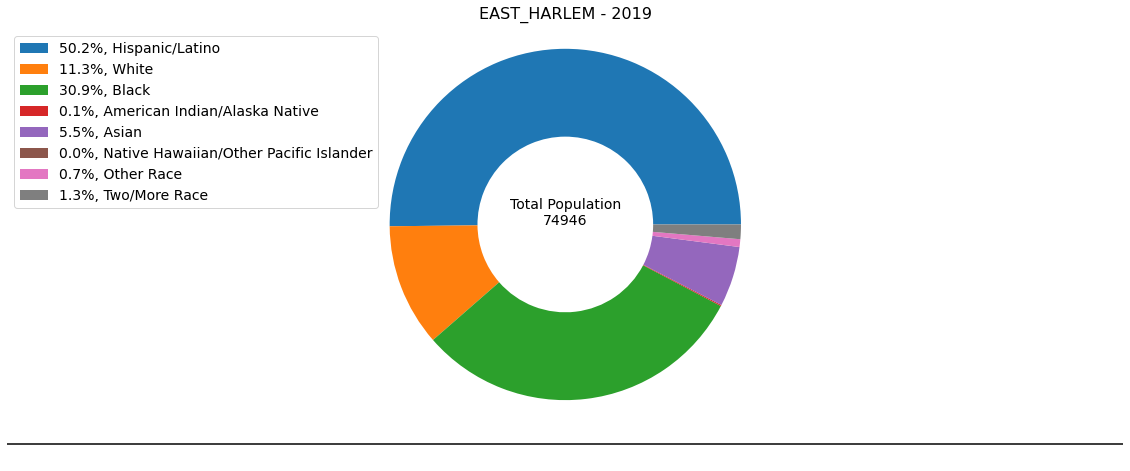

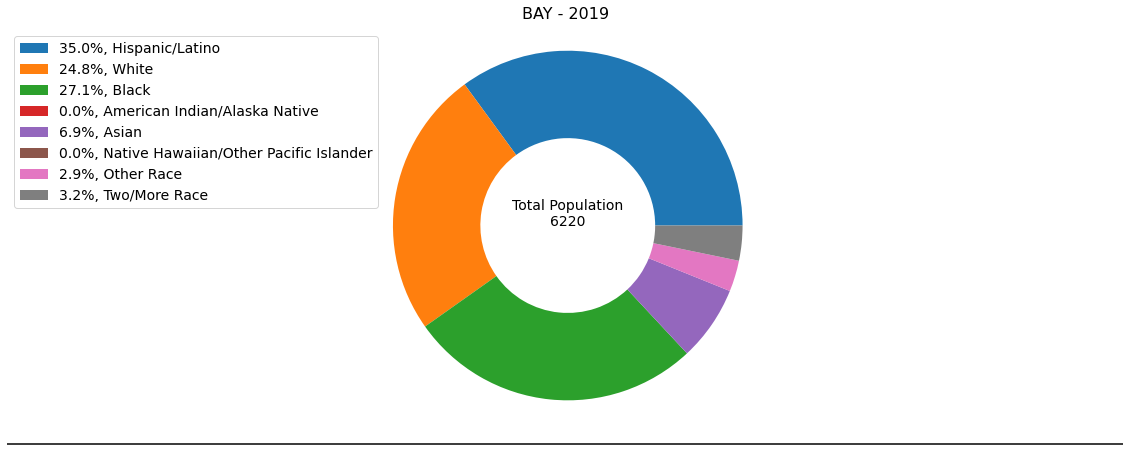

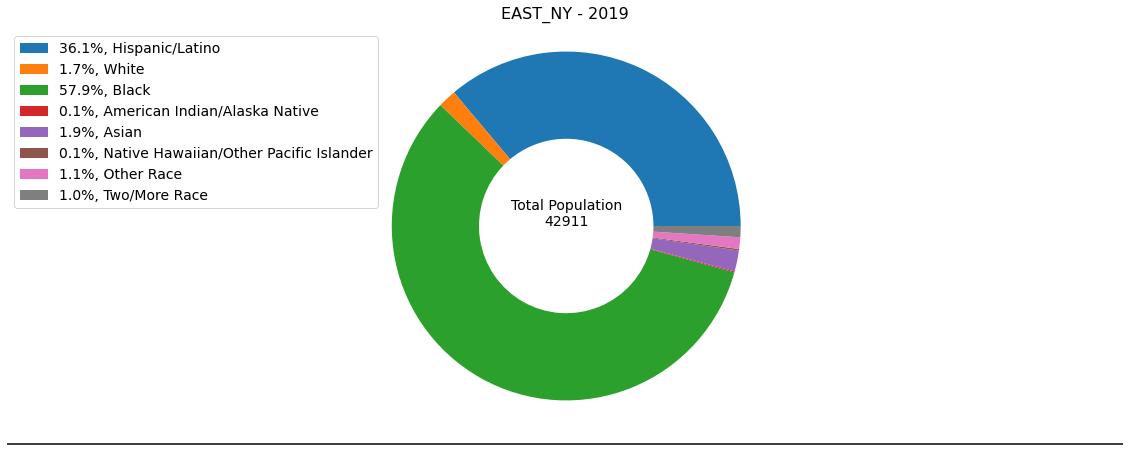

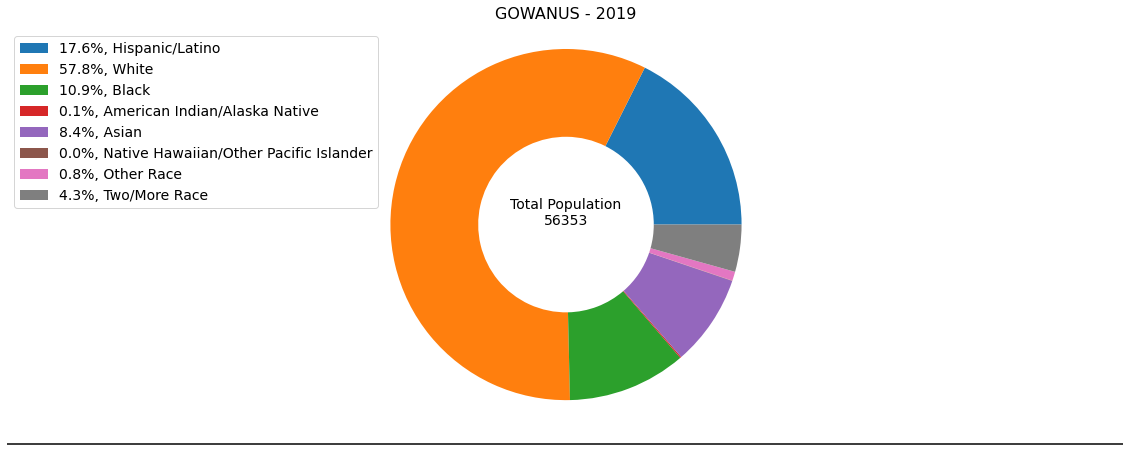

In [ ]:
getPie("all", 2019)

# Unsupervised Learning

In [ ]:
# Run it just in case variables are not set previously
years = ['2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016',
         '2017', '2018', '2019']
neigh_name = ['inwood', 'rockaway', 'jerome', 'east_harlem', 'bay', 'east_ny', 'gowanus']

In [ ]:
def superFilter(df, year):
  if(year < 2017):
    mapping = {
        "GEO_ID": "GEO ID",
        "NAME_x": "Name",
        "state": "State ID",
        "tract": "Tract Number",
        "county": "County ID",
        "geometry": "Geometry",
        "DP05_0001E": "Total Population",
        "DP05_0066E": "Hispanic/Latino",
        "DP05_0072E": "White",
        "DP05_0073E": "Black",
        "DP05_0074E": "American Indian/Alaska Native",
        "DP05_0075E": "Asian",
        "DP05_0076E": "Native Hawaiian/Other Pacific Islander",
        "DP05_0077E": "Other Race",
        "DP05_0078E": "Two/More Race",
    }
  else:
    mapping = {
        "GEO_ID": "GEO ID",
        "NAME_x": "Name",
        "state": "State ID",
        "tract": "Tract Number",
        "county": "County ID",
        "geometry": "Geometry",
        "DP05_0001E": "Total Population",
        "DP05_0071E": "Hispanic/Latino",
        "DP05_0077E": "White",
        "DP05_0078E": "Black",
        "DP05_0079E": "American Indian/Alaska Native",
        "DP05_0080E": "Asian",
        "DP05_0081E": "Native Hawaiian/Other Pacific Islander",
        "DP05_0082E": "Other Race",
        "DP05_0083E": "Two/More Race",
    }
  result = pd.DataFrame()
  for key, val in mapping.items():
    result = pd.concat([result, df[key]], axis=1)
    result = result.rename(columns={key: val})
  return result

In [ ]:
def megaDF(year):
  megaFrame = pd.DataFrame()
  for i in neigh_name:
    df = i + '_df_' + str(year)
    megaFrame = pd.concat([megaFrame, globals()[df]])
  megaFrame = megaFrame.loc[:,~megaFrame.columns.duplicated()] # Remove duplication (Name, GEOID, Tract, etc.)
  return megaFrame

In [ ]:
# Get NYC
inNYC = ['005', '047', '061', '081', '085']
nyc_tract = gpd.read_file('/content/Urban_Rezoning_Displacement/Resources/Data/Census Tact Shape File/tl_2021_36_tract.shp')
newNYC = nyc_tract[nyc_tract['COUNTYFP'].isin(inNYC)]
newNYC.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,047,069601,36047069601,696.01,Census Tract 696.01,G5020,S,456923,47776,+40.6271699,-073.9153676,"POLYGON ((-73.91860 40.63210, -73.91692 40.631..."
1,36,047,069602,36047069602,696.02,Census Tract 696.02,G5020,S,688168,172866,+40.6227610,-073.9092489,"POLYGON ((-73.91747 40.62151, -73.91699 40.621..."
2,36,047,079801,36047079801,798.01,Census Tract 798.01,G5020,S,129680,0,+40.6600109,-073.9587186,"POLYGON ((-73.96077 40.66173, -73.95704 40.661..."
3,36,047,079802,36047079802,798.02,Census Tract 798.02,G5020,S,106366,0,+40.6579906,-073.9613711,"POLYGON ((-73.96281 40.66050, -73.96201 40.660..."
4,36,047,105801,36047105801,1058.01,Census Tract 1058.01,G5020,S,418443,0,+40.6492205,-073.8805957,"POLYGON ((-73.88550 40.65309, -73.88502 40.653..."


In [ ]:
# To test the merging
ultimateDF = megaDF(2019)

In [ ]:
# Get the Geometry by using the tractgeometry function
ultimateDF = tractgeometry(ultimateDF)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# Make sure the year matches what you requested previously
ultimateDF = superFilter(ultimateDF, 2019)
ultimateDF.head()

,GEO ID,Name,State ID,Tract Number,County ID,Geometry,Total Population,Hispanic/Latino,White,Black,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Other Race,Two/More Race
0,36061029900,"Census Tract 299, New York County, New York",36,29900,61,"POLYGON ((-73.92441 40.86171, -73.92362 40.862...",3737,2847,100,754,5,9,0,9,13
1,36061030300,"Census Tract 303, New York County, New York",36,30300,61,"POLYGON ((-73.92197 40.86922, -73.92164 40.869...",4535,2387,1624,229,0,184,0,0,111
2,36061030700,"Census Tract 307, New York County, New York",36,30700,61,"POLYGON ((-73.91946 40.87225, -73.91846 40.873...",3920,1156,2116,383,10,147,14,39,55
3,36061029300,"Census Tract 293, New York County, New York",36,29300,61,"POLYGON ((-73.92311 40.86702, -73.92121 40.867...",9397,8219,655,376,0,90,0,15,42
4,36061029100,"Census Tract 291, New York County, New York",36,29100,61,"POLYGON ((-73.92727 40.86554, -73.92611 40.865...",12165,10077,769,647,0,495,0,17,160


In [ ]:
raceCat = ['Hispanic/Latino','White','Black','American Indian/Alaska Native','Asian','Native Hawaiian/Other Pacific Islander','Other Race','Two/More Race']
normRace = ultimateDF[raceCat].div(ultimateDF[raceCat].sum(axis=1), axis=0).dropna()
# normRace_df = ultimateDF.merge(normRace, left_index=True, right_index=True, how='inner', suffixes=['','_norm'])
normRace_df.head()

,GEO ID,Name,State ID,Tract Number,County ID,Geometry,Total Population,Hispanic/Latino,White,Black,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Other Race,Two/More Race,Hispanic/Latino_norm,White_norm,Black_norm,American Indian/Alaska Native_norm,Asian_norm,Native Hawaiian/Other Pacific Islander_norm,Other Race_norm,Two/More Race_norm
0,36061029900,"Census Tract 299, New York County, New York",36,29900,61,"POLYGON ((-73.92441 40.86171, -73.92362 40.862...",3737,2847,100,754,5,9,0,9,13,0.761841,0.026759,0.201766,0.001338,0.002408,0.000000,0.002408,0.003479
1,36061030300,"Census Tract 303, New York County, New York",36,30300,61,"POLYGON ((-73.92197 40.86922, -73.92164 40.869...",4535,2387,1624,229,0,184,0,0,111,0.526351,0.358104,0.050496,0.000000,0.040573,0.000000,0.000000,0.024476
2,36061030700,"Census Tract 307, New York County, New York",36,30700,61,"POLYGON ((-73.91946 40.87225, -73.91846 40.873...",3920,1156,2116,383,10,147,14,39,55,0.294898,0.539796,0.097704,0.002551,0.037500,0.003571,0.009949,0.014031
3,36061029300,"Census Tract 293, New York County, New York",36,29300,61,"POLYGON ((-73.92311 40.86702, -73.92121 40.867...",9397,8219,655,376,0,90,0,15,42,0.874641,0.069703,0.040013,0.000000,0.009578,0.000000,0.001596,0.004470
4,36061029100,"Census Tract 291, New York County, New York",36,29100,61,"POLYGON ((-73.92727 40.86554, -73.92611 40.865...",12165,10077,769,647,0,495,0,17,160,0.828360,0.063214,0.053185,0.000000,0.040691,0.000000,0.001397,0.013152


In [ ]:
# Keep the GEO ID so we could match correctly later for geometry information
clusterable = normRace_df[['GEO ID','Hispanic/Latino_norm','White_norm','Black_norm','American Indian/Alaska Native_norm','Asian_norm','Native Hawaiian/Other Pacific Islander_norm','Other Race_norm','Two/More Race_norm']]
clusterable.set_index('GEO ID', inplace=True)
len(clusterable)

76

In [ ]:
k = 4 # Higher doesn't mean better, but can see the categorization more
gm = GaussianMixture(n_components=k,random_state=0)
gm_res = gm.fit(clusterable)
gm_res.labels_ = gm_res.predict(clusterable)# Retreive Labels

In [ ]:
# Mapping Geo ID to Cluster Labels
clust = {
    clusterable.index[i]:gm_res.labels_[i] for i in range(len(gm_res.labels_))
}

In [ ]:
# Dataframe | Adding in Geometry and Label
res_map = pd.DataFrame({'Geo_Id':clusterable.index, 'Label':gm_res.labels_, 'Geometry':ultimateDF.Geometry})

In [ ]:
# Merging Cluster by Labels 
cluster_merge = normRace_df.reset_index().merge(res_map,left_on='GEO ID',right_on='Geo_Id').\
                groupby(['Label']).sum().reset_index()

In [ ]:
cluster_merge = cluster_merge[[col for col in cluster_merge.columns if col not in ['Label','GEO ID','Geo_Id']]]
cluster_merge['Label'] = [0,1,2,3]

In [ ]:
# Only For Normalized Race
cluster_merge = cluster_merge[['Hispanic/Latino_norm','White_norm','Black_norm','American Indian/Alaska Native_norm','Asian_norm','Native Hawaiian/Other Pacific Islander_norm','Other Race_norm','Two/More Race_norm']]
cluster_merge

,Hispanic/Latino_norm,White_norm,Black_norm,American Indian/Alaska Native_norm,Asian_norm,Native Hawaiian/Other Pacific Islander_norm,Other Race_norm,Two/More Race_norm
0,21.923804,4.241400,14.441804,0.011102,1.530766,0.000696,0.271012,0.579415
1,2.517017,8.572478,0.995859,0.021067,1.174874,0.007904,0.095946,0.614856
2,1.210972,0.455932,4.884509,0.031080,0.158090,0.031442,0.118368,0.109607
3,9.490938,0.114206,2.078366,0.061781,0.149787,0.000000,0.047642,0.057280


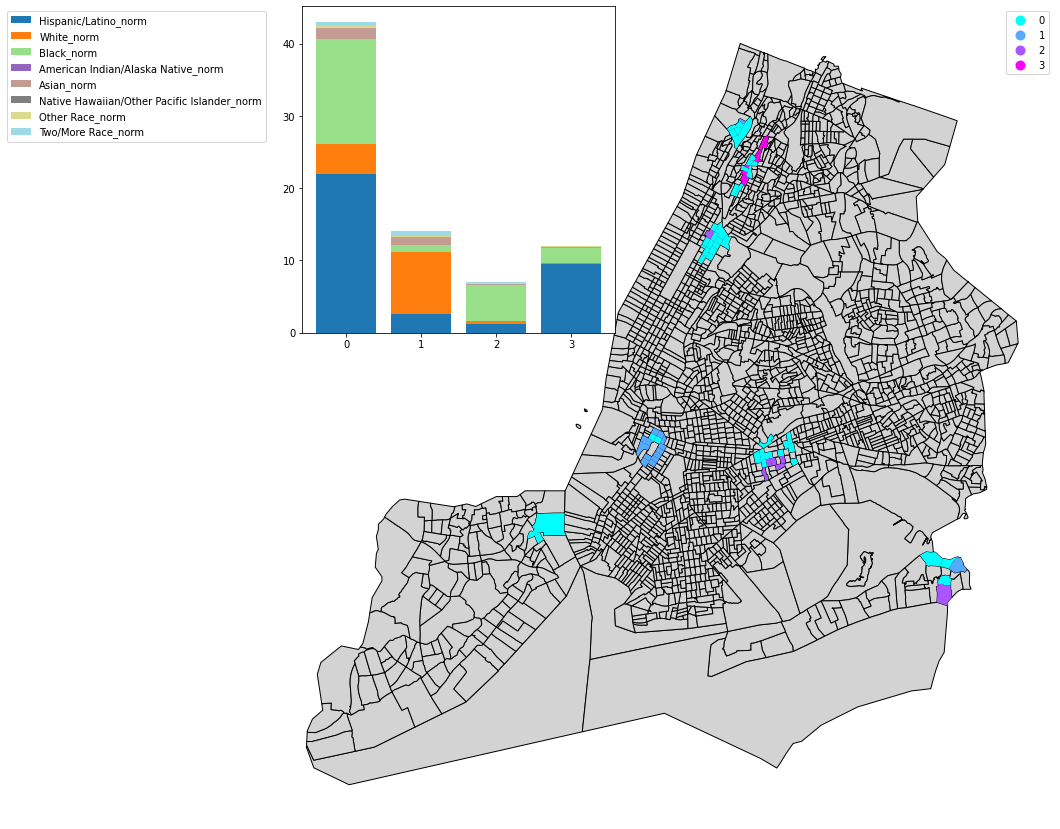

In [ ]:
res_map['Label'] = res_map['Label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,15))
newNYC.plot(facecolor='lightgrey', edgecolor='black', ax=ax)
newNYC.merge(res_map,left_on='GEOID',right_on='Geo_Id', how='left').plot(column='Label',cmap='cool',legend=True,ax=ax)
ax.axis('off')

# Not sure if we need this...
ins = ax.inset_axes([0.04,0.6,0.4,0.4])
NUM_COLORS = len(cluster_merge.columns)
cm = plt.cm.get_cmap('tab20', NUM_COLORS)

ins.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
bot = np.zeros(4)

for col in cluster_merge.columns:
    if col!= 'Label' and col!='GEOID' and col!='Geo_Id':
        values = cluster_merge[col].values
        ins.bar([0,1,2,3], values, bottom = bot, label=col)
        bot = bot + values
    
ins.set_xticks([0,1,2,3])    
ins.legend(bbox_to_anchor=(-0.1, 1))   

What do the different clusters tell us? - This is for 2019 with 8 clusters <br>
Well, each tells us the approximate distribution of the races of the census track location within the clusters. For example, the census tract location within cluster 3 seems to be dominated by Hispanics and Latino. Census tract location within cluster 4 seems to be dominated by Hispanic/Latino and black. From here, we use the map of NYC to observe the "approximate diversity" per census tract. <br>

Basically, we could use this to understand if the neighborhood's location is affected by the rezoning initiation. <br>

Some questions we could ask and answer is... <br>
* Does the location of the neighborhood affect the diversity after rezoning? <br>
* Did one group of races dominate the other before and after rezoning? <br>
* Does the neighborhood's historic culture affect the diversity around those census tract's locations?

Since this is a cluster (unsupervised learning), we could compare and contrast the years - before/after rezoning - to see if there is an impact on a census tract level.

# Per Capita Income Plots

In [ ]:
# Run This for DP03 data
years = ['2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016',
         '2017', '2018', '2019'] # 5yr data | Example: 2009 = 2005 to 2009 and 2010 = 2006 to 2010 and so on...
api_key = "7c0e4ed190ac93f0a67c85514e7e1b718dcc0215"

# This function will get all DP03 (Demographic) Data.
# It is possible to filter the data during fetching, but to play it safe, getting
# all the data and filter it after might be better. This way we can control what we want.
for x in years:
  url = str("https://api.census.gov/data/{}/acs/acs5/profile?get=group(DP03)&for=tract:*&in=state:36&key={}").format(x, api_key)
  # print(url) # To Test If URL is properly working
  apiData = urllib.urlopen(url).read().decode('utf-8')  # Fetching api data from url
  apiData_JSON = json.loads(apiData) # "Converts" into JSON
  apiData_df = pd.DataFrame(apiData_JSON) # Creates dataframe from JSON
  apiData_df.to_csv("/content/" + x + "_acs_data_03.csv", index=False, header=False) # Save as CSV under content folder

In [ ]:
# Run This
neigh_name = ['inwood', 'rockaway', 'jerome', 'east_harlem', 'bay', 'east_ny', 'gowanus']
# neigh_name = ['east_ny'] # to Test

# After you run this all the dataframe will be created for each year with each neighborhood!
for i in years:
  fetch_csv = pd.read_csv(i + '_acs_data_03.csv') # Get the saved csv file from api call
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_incdf_' + i # Dynamically create names for each data frame and neighborhood
    array_name = neigh_name[j] + '_array'  # Pull in the corresponding array of census tract
    vars()[df_name] = beautifyCol(fetch_csv.loc[fetch_csv['NAME'].isin(vars()[array_name])])

In [ ]:
for i in ['2009']:
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_incdf_' + i # FORMAT: neighborhood_di_year
    vars()[df_name] = vars()[df_name][['GEO_ID', 	'NAME', 	'state', 	'county', 	'tract', 'DP03_0089E' , 'DP03_0001E' 	]]
    vars()[df_name].rename(columns = {'DP03_0089E':'PCINCOME', 'DP03_0001E':'WKPOP'} , inplace = True)

for i in ['2010', '2011', '2012','2013', '2014', '2015', '2016', '2017', '2018', '2019']:
  for j in range(len(neigh_name)):
    df_name = neigh_name[j] + '_incdf_' + i # FORMAT: neighborhood_di_year
    vars()[df_name] = vars()[df_name][['GEO_ID', 	'NAME', 	'state', 	'county', 	'tract', 'DP03_0088E' , 'DP03_0001E' 	]]
    vars()[df_name].rename(columns = {'DP03_0088E':'PCINCOME',  'DP03_0001E':'WKPOP'} , inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def income_plt(neigh_name):
  years = ['2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016',
         '2017', '2018', '2019']
  pc_income = []
  for i in years:
    df_name = neigh_name + '_incdf_' + i
    pc_income.append((globals()[df_name]['PCINCOME']*globals()[df_name]['WKPOP']).sum()/(globals()[df_name]['WKPOP'].sum()))
  avg_incomes = pd.DataFrame(pc_income, index =years, columns =['Average Per Capita Income'])
  return avg_incomes

In [ ]:
neigh_name = 'inwood'
df_name = neigh_name + '_incdf_' + '2009'
(vars()[df_name]['PCINCOME']*vars()[df_name]['WKPOP']).sum()/vars()[df_name]['WKPOP'].sum()

22374.5047837353

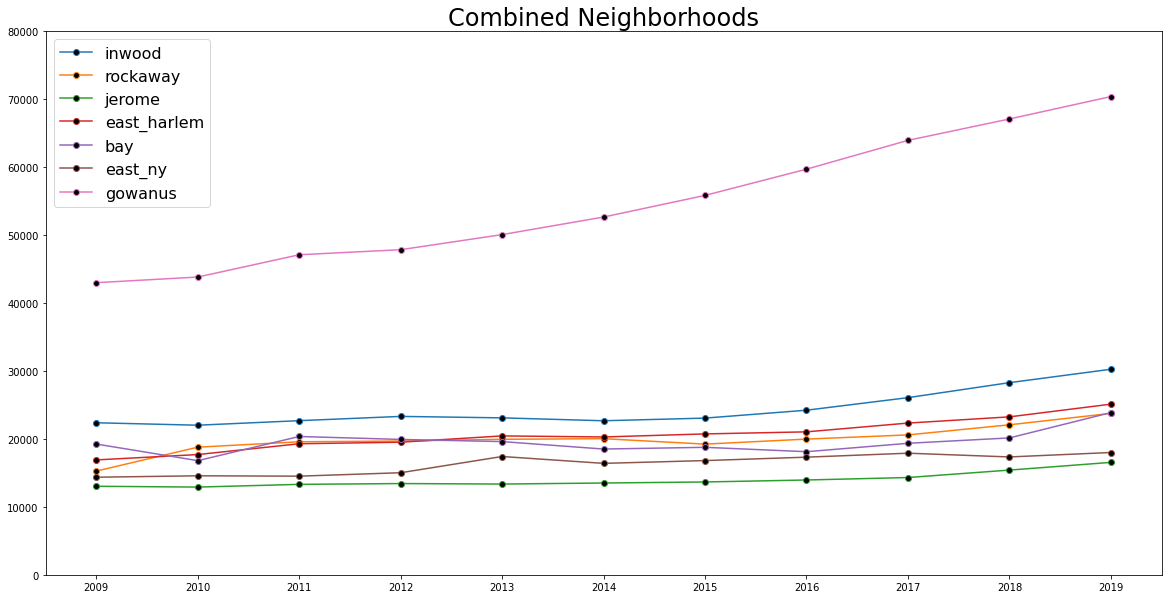

In [ ]:
# Plotting all in one
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
neigh_name = ['inwood', 'rockaway', 'jerome', 'east_harlem', 'bay', 'east_ny', 'gowanus']
for i in neigh_name:
  ax.plot(income_plt(i), linestyle='-', marker='o', markerfacecolor='black', label=i)
plt.ylim([0, 80000])
plt.title("Combined Neighborhoods", fontsize=24)
plt.legend(loc='upper left', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Inwood')

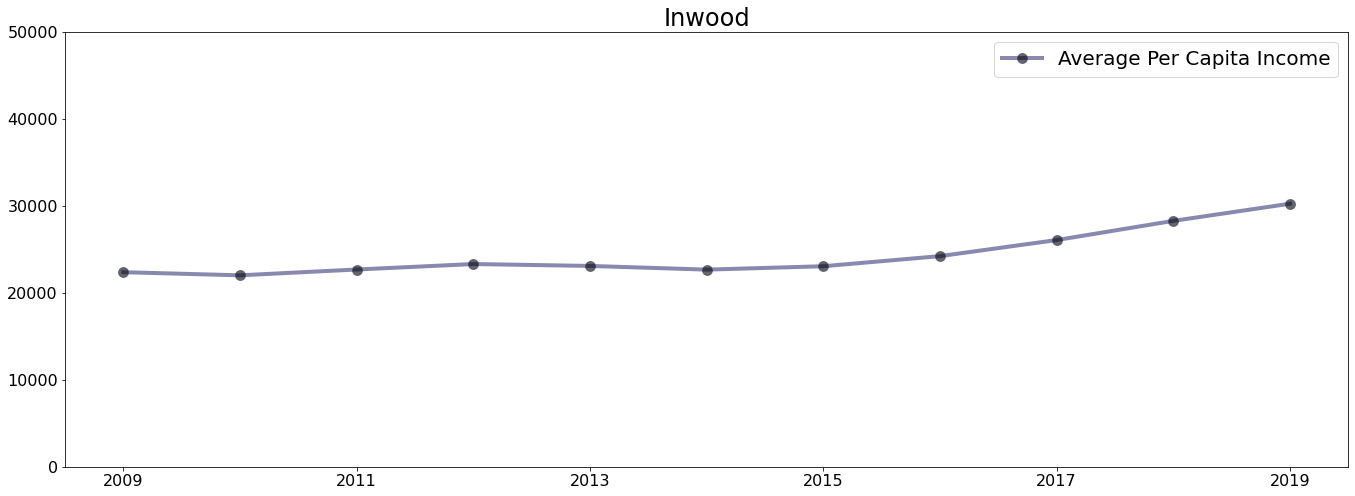

In [ ]:
income_plt('inwood').plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 20, bbox_to_anchor=(1.0, 1.0))
plt.ylim([0, 50000])
plt.title("Inwood",fontsize = 24)

Text(0.5, 1.0, 'Far Rockaway')

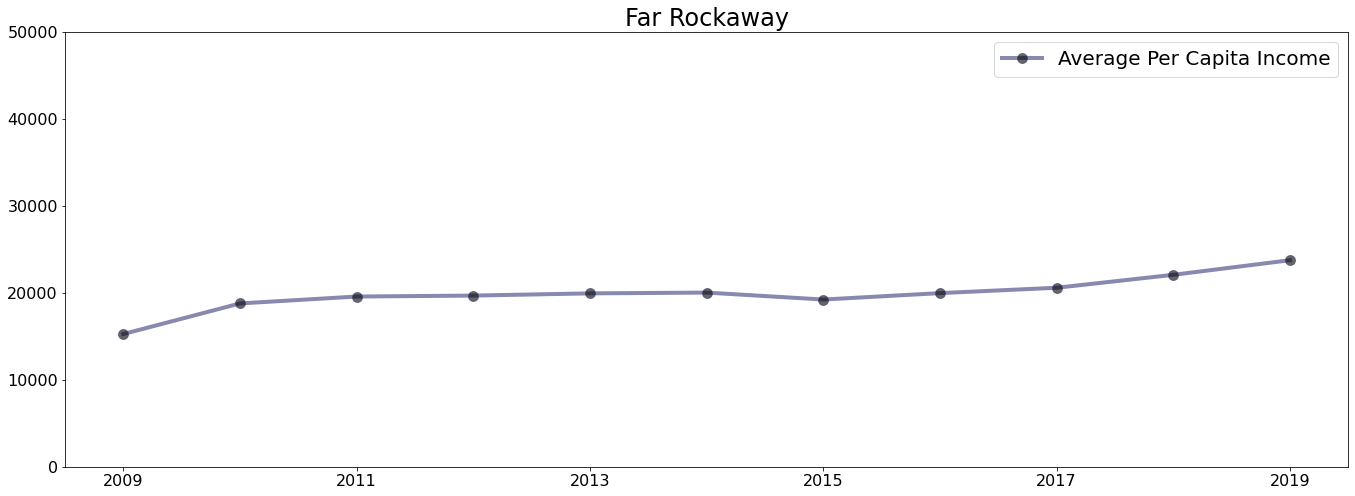

In [ ]:
income_plt('rockaway').plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 20, bbox_to_anchor=(1.0, 1.0))
plt.ylim([0, 50000])
plt.title("Far Rockaway",fontsize = 24)

In [ ]:
neigh_name = ['inwood', 'rockaway', 'jerome', 'east_harlem', 'bay', 'east_ny', 'gowanus']

Text(0.5, 1.0, 'Jerome Avenue')

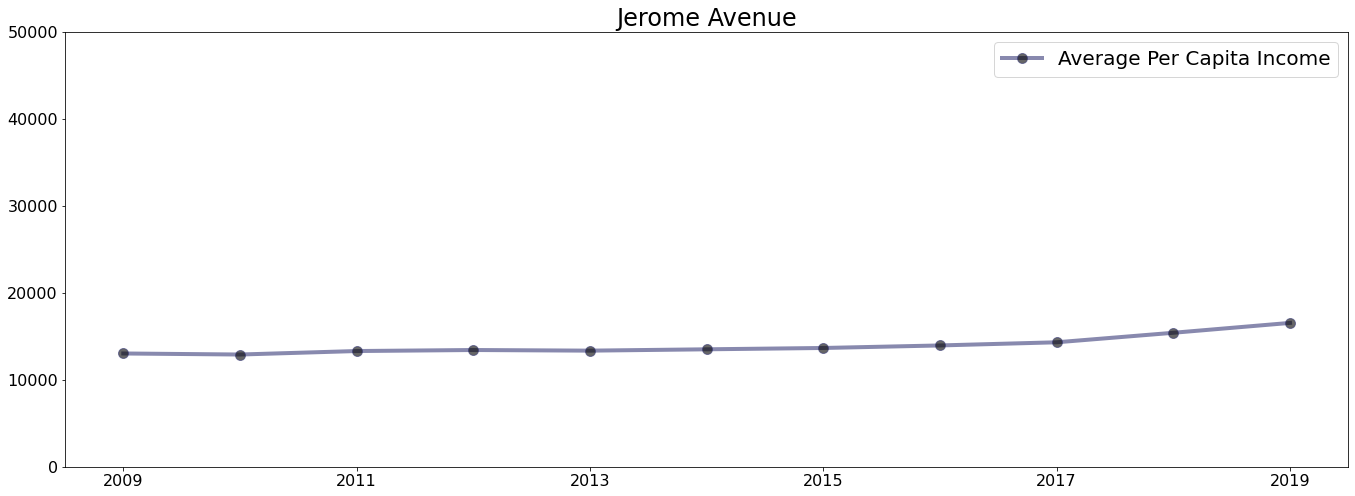

In [ ]:
income_plt('jerome').plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 20, bbox_to_anchor=(1.0, 1.0))
plt.ylim([0, 50000])
plt.title("Jerome Avenue",fontsize = 24)

Text(0.5, 1.0, 'Gowanus')

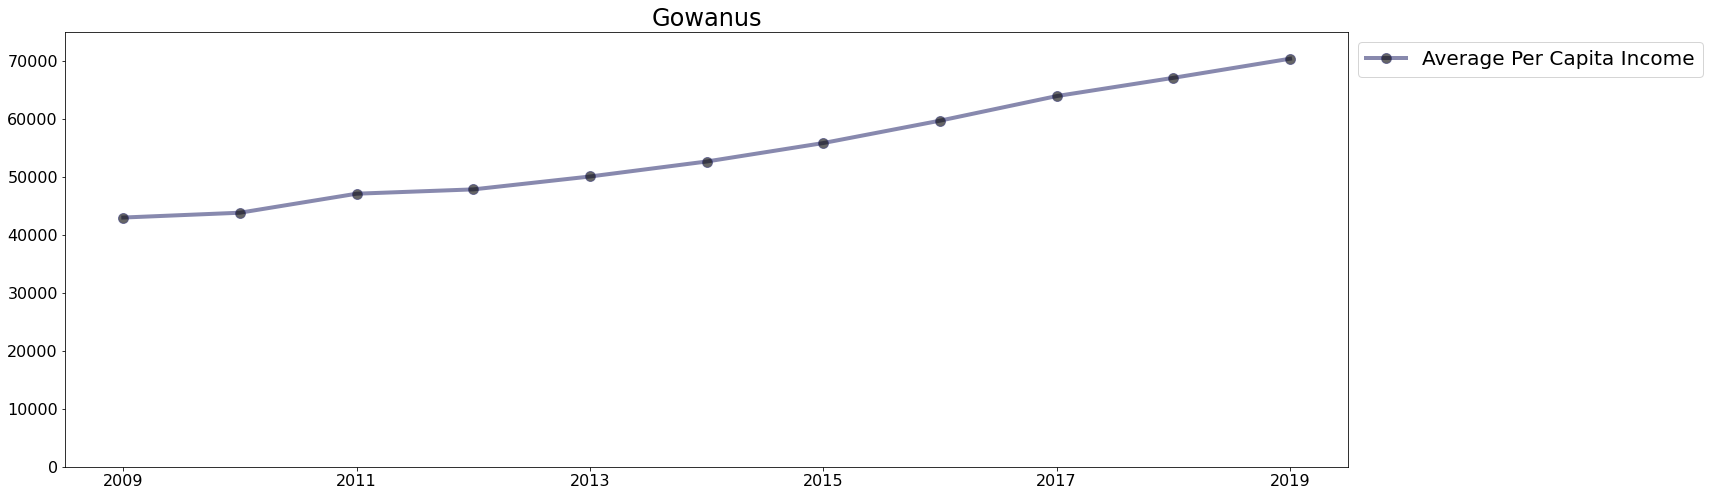

In [ ]:
income_plt('gowanus').plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 20, bbox_to_anchor=(1.0, 1.0))
plt.ylim([0, 75000])
plt.title("Gowanus",fontsize = 24)

Text(0.5, 1.0, 'Bay')

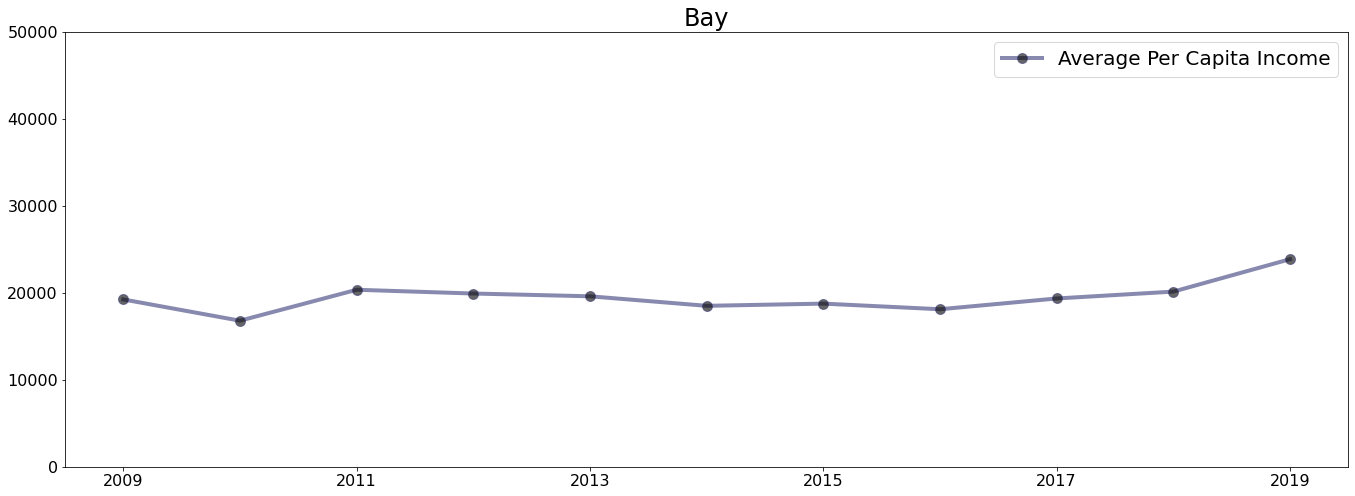

In [ ]:
income_plt('bay').plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 20, bbox_to_anchor=(1.0, 1.0))
plt.ylim([0, 50000])
plt.title("Bay",fontsize = 24)

Text(0.5, 1.0, 'East Harlem')

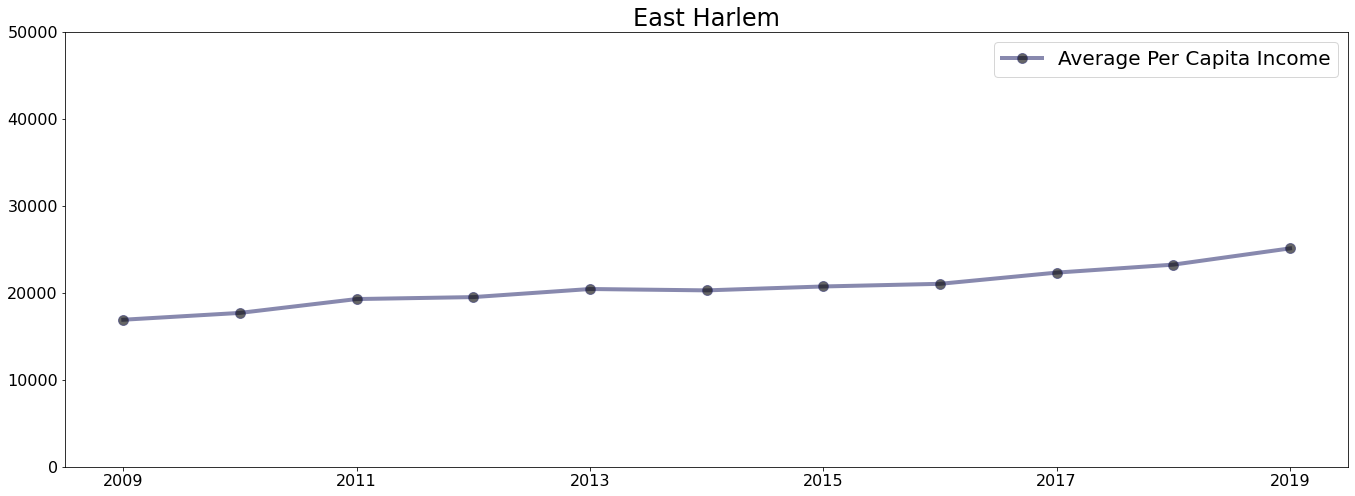

In [ ]:
income_plt('east_harlem').plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 20, bbox_to_anchor=(1.0, 1.0))
plt.ylim([0, 50000])
plt.title("East Harlem",fontsize = 24)

Text(0.5, 1.0, 'East NY')

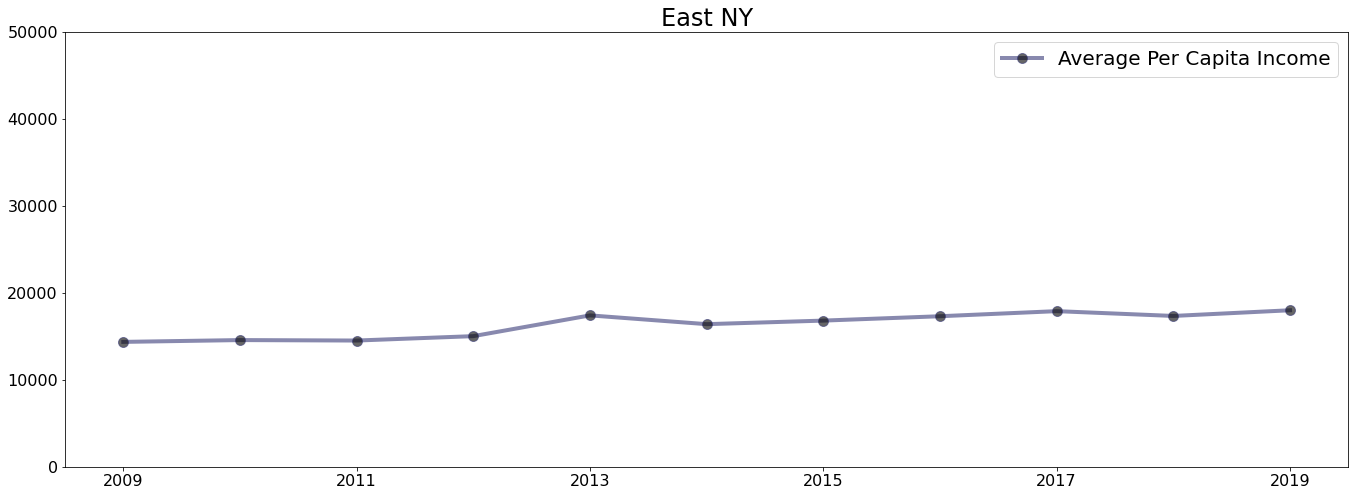

In [ ]:
income_plt('east_ny').plot(linestyle='-', marker='o', markersize=10, markerfacecolor='black', cmap='tab20b', figsize=(23,8),linewidth=4.0,alpha=0.6, title=True, fontsize=16, legend = True)
plt.legend(fontsize = 20, bbox_to_anchor=(1.0, 1.0))
plt.ylim([0, 50000])
plt.title("East NY",fontsize = 24)

#Income Hypothesis Testing


In [ ]:
stats.ks_2samp(inwood_incdf_2009['PCINCOME'], inwood_incdf_2019['PCINCOME'])

Ks_2sampResult(statistic=0.4, pvalue=0.6883116883116884)

In [ ]:
stats.ks_2samp(jerome_incdf_2009['PCINCOME'], jerome_incdf_2019['PCINCOME'])

Ks_2sampResult(statistic=0.6785714285714286, pvalue=0.0007527479210991395)

In [ ]:
stats.ks_2samp(rockaway_incdf_2009['PCINCOME'], rockaway_incdf_2019['PCINCOME'])

Ks_2sampResult(statistic=0.7142857142857143, pvalue=0.16666666666666685)

In [ ]:
stats.ks_2samp(east_harlem_incdf_2009['PCINCOME'], east_harlem_incdf_2019['PCINCOME'])

Ks_2sampResult(statistic=0.6071428571428571, pvalue=0.01039419323441415)

In [ ]:
stats.ks_2samp(east_ny_incdf_2009['PCINCOME'], east_ny_incdf_2019['PCINCOME'])

Ks_2sampResult(statistic=0.6373626373626373, pvalue=0.003429802126800885)

In [ ]:
stats.ks_2samp(gowanus_incdf_2009['PCINCOME'], gowanus_incdf_2019['PCINCOME'])

Ks_2sampResult(statistic=0.6875, pvalue=0.0002803219050286909)

In [ ]:
stats.ks_2samp(bay_incdf_2009['PCINCOME'], bay_incdf_2019['PCINCOME'])

Ks_2sampResult(statistic=0.5, pvalue=1.0)